---
<center><h1> Lesson 5 - Intro to machine learning with scikit-learn (advanced topics)</center></h1> 

---

Machine learning allows solving the large set of various issues. It is not very simple to find the good method or model to solve the task with high accuracy and ussualy we need to try many different variants. The following [graph](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) may help you to define the need model depending on the task requirements and input data:

<img src="images/ml_map.png"> 

In this lesson we will consider a few common used model from different problem branches.

---
# Decision trees

Decision Trees (DTs) are a non-parametric supervised learning method used for _classification_ and _regression_. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In a decision tree the data is split at each node according to a decision rule. This corresponds to nested _if-then-else-rules_. In the if-part of such a rule are decison is made based on a feature of the data record.

Decision trees as a classifier search for a series of rules that intelligently organize the given dataset. As a thought experiment, say you wanted to figure out what country a person is living in. First, you ask if they are in the east or west hemisphere. The answer is west. Are they within the continent of North America? Yes. Are they above or below the 42nd parallel? Above. At this point, you are fairly convinced the person is in Canada. You're not sure. It may be someone from the USA, but most of the people in the world that fit that criteria live in Canada.

<img src="images/decision_trees.jpg"  width=70%>

Each question eliminates some of the ambiguity around what country a person is from. The better the question, the more ambiguity is removed. In this way, the decision tree automates the selection of sequences of questions to form good guesses about the class a sample is in. 

To demonstrate this, we'll use a common iris dataset and explore further what the decision tree is doing.

In [48]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from os.path import exists 

# Load the iris dataset
iris = load_iris()
# Create a new `DecisionTreeClassifier` and use the fit method of the classifier to do the learning job
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

`criterion='gini'` denotes the _Gini impurity_, which is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset. [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) supports the `criterion='entropy'` for the information gain.

Once trained, we can export the tree in Graphviz format using the [`export_graphviz`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) exporter.

In [49]:
from sklearn.tree import export_graphviz

# Fit classifier
dtc = dtc.fit(iris.data, iris.target)

with open("iris.dot", 'w') as f:
    f = export_graphviz(dtc, out_file=f)
    
# Check whether "iris.dot" file was created
import os.path
print os.path.exists("iris.dot")

True


Let's draw the decision tree. We will use the [`pydot`](https://pypi.python.org/pypi/pydot) Python library

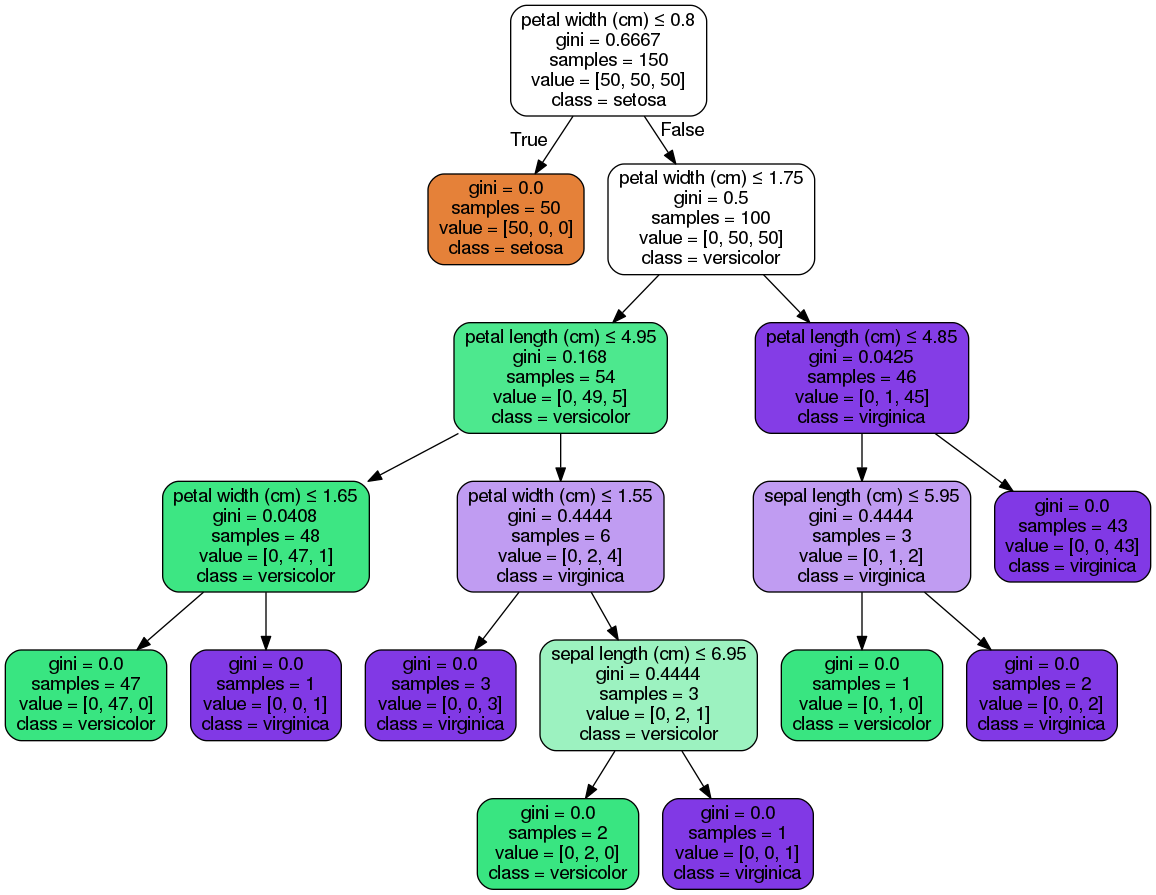

In [50]:
from sklearn.externals.six import StringIO
from IPython.display import Image
# pydot module provides with a full interface to create handle modify and process graphs in Graphviz’s dot language
import pydot

dot_file = StringIO() 
export_graphviz(dtc, out_file=dot_file, 
                feature_names=iris.feature_names, 
                class_names=iris.target_names,  
                filled=True, rounded=True, 
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_file.getvalue())  
Image(graph.create_png())  

After being fitted, the model can then be used to predict the class of samples, which we have used in the previous lesson. Compare current result with the previous ones.

As we remember, in the Iris dataset we have only three different target values (discrete values 0, 1, 2). The target value 0 corresponds to Iris Setosa, the number 1 matches with Iris Versicolor and the last number 2 corresponds to Iris Virginica.

Look how features corresponds to each iris kind

In [51]:
# Create a pandas DataFrame for Iris dataset
import pandas as pd

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target
print "Iris dataset contains {} rows.".format(iris_df.index.size)
print "\nFeatures values for Iris Setosa (class 0):"
iris_df.head()

Iris dataset contains 150 rows.

Features values for Iris Setosa (class 0):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
print "Features values for Iris Versicolor (class 1):"
iris_df[50:55]

Features values for Iris Versicolor (class 1):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [53]:
print "Features values for Iris Virginica (class 2):"
iris_df[100:105]

Features values for Iris Virginica (class 2):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [54]:
X_new = [
    [5.0,  3.6,  1.3,  0.25],   # very similar to the Iris Setosa
    [7.0,  3.0,  5.0,  1.5],   # very similar to the Iris Versicolor
    [6.5,  3.0,  6.2,  2.25],   # very similar to the Iris Virginica
    [3.0,  1.5,  2.5,  1.0]    # length and width parameters are far from each group
]

dtc.predict(X_new)

array([0, 2, 2, 1])

We can plot the decision surface of a decision tree trained on pairs of features of the iris dataset.

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


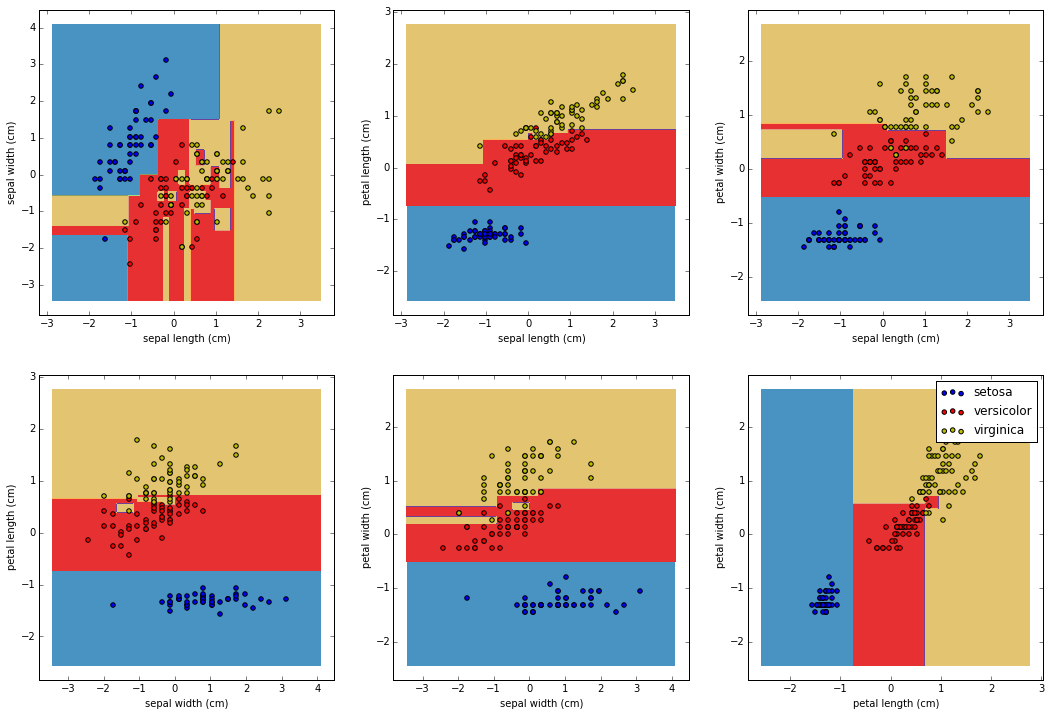

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Change plot size
plt.rcParams["figure.figsize"] = (18.0, 12.0)

# combinations(range(4), 2) => [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for i, pair in enumerate(combinations(range(4), 2)):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier(criterion='entropy').fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, i+1)

    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    ax = plt.contourf(xx, yy, pred, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(3), "bry"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
    plt.axis("tight")

plt.legend()
plt.show()

Decision trees can also be applied to regression problems, using the [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) class. 

Let's aplly `DecisionTreeRegressor` to boston dataset, which we have also consider in the previous lesson.

In [56]:
from sklearn.datasets import load_boston

boston = load_boston()
print "Boston dataset has {} features: \n{}".format(len(boston.feature_names), list(boston.feature_names))

Boston dataset has 13 features: 
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [57]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)
dtr

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [58]:
X = boston.data
y = boston.target
# Fir regressor
dtr = dtr.fit(X, y)

# Let's look at the importance of each features of boston dataset
# It can be done using the attribute feature_importances_, that returns the relative weight 
# of each feature (Gini importance) and its influence on the house price - target value
fi = dtr.feature_importances_

ordered = []
# Define the respective name of the feature
for i, val in enumerate(fi):
    ordered.append((boston.feature_names[i], val))

# Sort features 
ordered = sorted(ordered, key=lambda x: x[1], reverse=True)
for i in ordered:
    print i[0], "-", round(i[1],4)

RM - 0.59
LSTAT - 0.2106
DIS - 0.0748
NOX - 0.0614
CRIM - 0.0195
TAX - 0.0141
AGE - 0.0095
PTRATIO - 0.007
B - 0.0066
INDUS - 0.002
CHAS - 0.0017
ZN - 0.0014
RAD - 0.0013


Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the `transform` method. 

[`SelectKBest`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) is often used for finding the most important features (i.e. those which gives the highest accuracy of a model). It has two arguments: the first one is a scoring function that returns univariate p-values (usually [`chi2`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2) (that computes chi-squared stats between each non-negative feature and class) and [`f_classif`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif) (that computes the ANOVA F-value for the provided sample) are used in classification problems, [`f_regression`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression) is used in regression problems) and the second one is the number of top features to select. 

Let's look at how it works

In [59]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=3)
selector.fit(X, y)

print "Scores of features:\n", selector.scores_
print "p-values of feature scores:\n", selector.pvalues_

Scores of features:
[  88.15124178   75.2576423   153.95488314   15.97151242  112.59148028
  471.84673988   83.47745922   33.57957033   85.91427767  141.76135658
  175.10554288   63.05422911  601.61787111]
p-values of feature scores:
[  2.08355011e-19   5.71358415e-17   4.90025998e-31   7.39062317e-05
   7.06504159e-24   2.48722887e-74   1.56998221e-18   1.20661173e-08
   5.46593257e-19   5.63773363e-29   1.60950948e-34   1.31811273e-14
   5.08110339e-88]


In [60]:
indices = np.argsort(selector.scores_)[::-1]
# Identify the list of top features
for f in range(len(boston.feature_names)):
    print "{:2d}) {}   {:.3f}".format(f+1, boston.feature_names[indices[f]], selector.scores_[indices[f]])

 1) LSTAT   601.618
 2) RM   471.847
 3) PTRATIO   175.106
 4) INDUS   153.955
 5) TAX   141.761
 6) NOX   112.591
 7) CRIM   88.151
 8) RAD   85.914
 9) AGE   83.477
10) ZN   75.258
11) B   63.054
12) DIS   33.580
13) CHAS   15.972


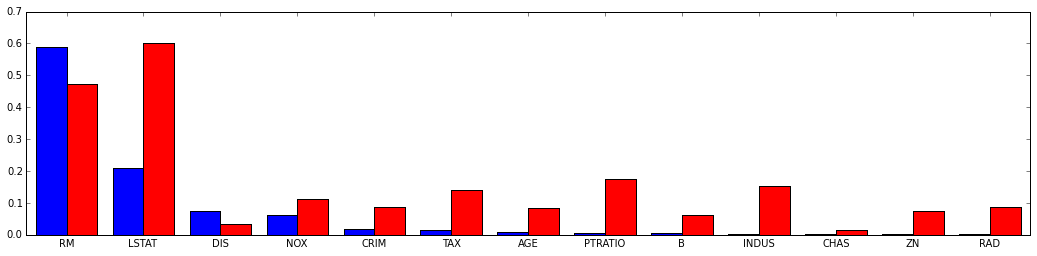

In [61]:
# Display results on a bar plot 
plt.rcParams["figure.figsize"] = (18.0, 4.0)

n = np.arange(len(ordered))
w = 0.4

kbest_scores = [0]*len(boston.feature_names)
for i, val in enumerate(ordered):
    kbest_scores[i] = selector.scores_[list(boston.feature_names).index(val[0])] / 1000

# Bars for feature_importances_
plt.bar(n, map(lambda x: x[1], ordered), w, color='blue')
# Bars for SelectKBest. We divide all values into 1000 to achive the same scale
plt.bar(n+w, kbest_scores, w, color='red')
plt.xticks(n + w, map(lambda x: x[0], ordered))
plt.margins(x=0.01)
plt.show()

Of course, results are various, because `feature_importances_` returns top features for the specific classifier or regressor, but `SelectKBest` returns the most important features indepedently on the model and possesses with general meaning.

Thus, we can see that the `RM` = average number of rooms per dwelling (as is written in decription of boston dataset) and `LSTAT` = % lower status of the population affect to the greatest extent on the houses' price. `DIS` = weighted distances to five Boston employment centres, `NOX` = nitric oxides concentration (parts per 10 million) and `CRIM` = per capita crime rate by town make also the large contribution to the price. It's very realistic result!

Let's compare `DecisionTreeRegressor` with a few various values of attribute `max_depth` (the maximum depth of the tree) with `LinearRegression` and [`Ridge` regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) (please learn this material yourself). 

DecisionTreeRegressor with max_depth=2 - score = 0.718, mse = 23.38.
DecisionTreeRegressor with max_depth=5 - score = 0.684, mse = 26.178.
DecisionTreeRegressor with max_depth=10 - score = 0.753, mse = 20.433.
LinearRegression - score = 0.767, mse = 19.275.
Ridge regression - score = 0.767, mse = 19.259.


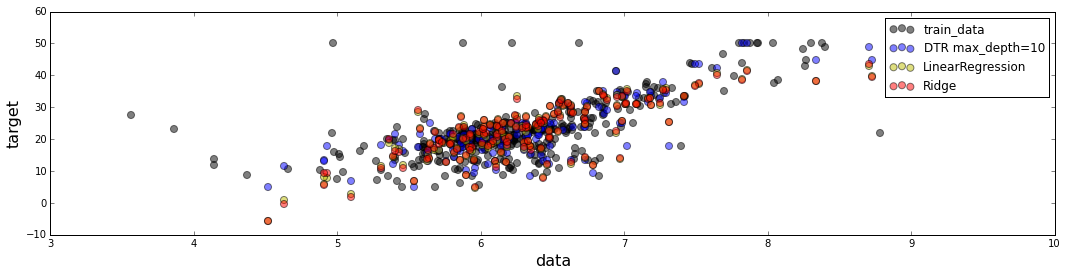

In [62]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

X = boston.data
y = boston.target
# Divide dataset into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# We will consider the impact onle of average number of rooms per dwelling RM to the price of house
X_plot = np.array(map(lambda x: x[5], X_test))

# Create and fit regression models
dtr_1 = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
dtr_2 = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
dtr_3 = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)

pred_1 = dtr_1.predict(X_test)
pred_2 = dtr_2.predict(X_test)
pred_3 = dtr_3.predict(X_test)
pred_4 = lr.predict(X_test)
pred_5 = ridge.predict(X_test)

print "DecisionTreeRegressor with max_depth=2 - score = {}, mse = {}." \
      .format(round(dtr_1.score(X_test, y_test), 3), round(np.mean((y_test - pred_1)**2), 3))
print "DecisionTreeRegressor with max_depth=5 - score = {}, mse = {}." \
      .format(round(dtr_2.score(X_test, y_test), 3), round(np.mean((y_test - pred_2)**2), 3))
print "DecisionTreeRegressor with max_depth=10 - score = {}, mse = {}." \
      .format(round(dtr_3.score(X_test, y_test), 3), round(np.mean((y_test - pred_3)**2), 3))
print "LinearRegression - score = {}, mse = {}." \
      .format(round(lr.score(X_test, y_test), 3), round(np.mean((y_test - pred_4)**2), 3))
print "Ridge regression - score = {}, mse = {}." \
      .format(round(ridge.score(X_test, y_test), 3), round(np.mean((y_test - pred_5)**2), 3))

# Draw train data
plt.scatter(np.array(map(lambda x: x[5], X_train)), y_train, c="k", label="train_data", alpha=0.5, s=50)
# Draw predicted values
plt.scatter(X_plot, pred_3, c="b", label="DTR max_depth=10", alpha=0.5, s=50)
plt.scatter(X_plot, pred_4, c="y", label="LinearRegression", alpha=0.5, s=50)
plt.scatter(X_plot, pred_5, c="r", label="Ridge", alpha=0.5, s=50)

plt.xlabel("data", size=16)
plt.ylabel("target", size=16)
plt.title("")
plt.legend()
plt.show()

In most cases `DecisionTreeRegressor` works better than linear regressors. Besides, ussualy the depth of the tree also impacts on the accuraccy of prediction.

---
# `k`-nearest neighbors

`k`-nearest neighbors, or KNN, is a supervised learning algorithm for either classification or regression. It's super intuitive and has been applied to many types of problems.

It's great for many applications, with personalization tasks being among the most common. To make a personalized offer to one customer, you might employ KNN to find similar customers and base your offer on their purchase behaviors. KNN has also been applied to medical diagnosis and credit scoring.

The strategy is to compare the new observation to those observations already labeled. The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant, or vary based on the local density of points. The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. 

Below picture shows how 3 and 5 nearest neighbors can be found

<img src="images/knn.png">

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [64]:
knn = knn.fit(iris.data, iris.target)

# Again test classifier with the same data sample 
X_new = [
    [5.0,  3.6,  1.3,  0.25],   # very similar to the Iris Setosa
    [7.0,  3.0,  5.0,  1.5],   # very similar to the Iris Versicolor
    [6.5,  3.0,  6.2,  2.25],   # very similar to the Iris Virginica
    [3.0,  1.5,  2.5,  1.0]    # length and width parameters are far from each group
]

knn.predict(X_new)

array([0, 1, 2, 1])

Let's demonstrate the work of `KNeighborsClassifier` on the iris dataset depending on the amount of nearest neighbors and weight function (`'uniform'` and `'distance'`) used in prediction:

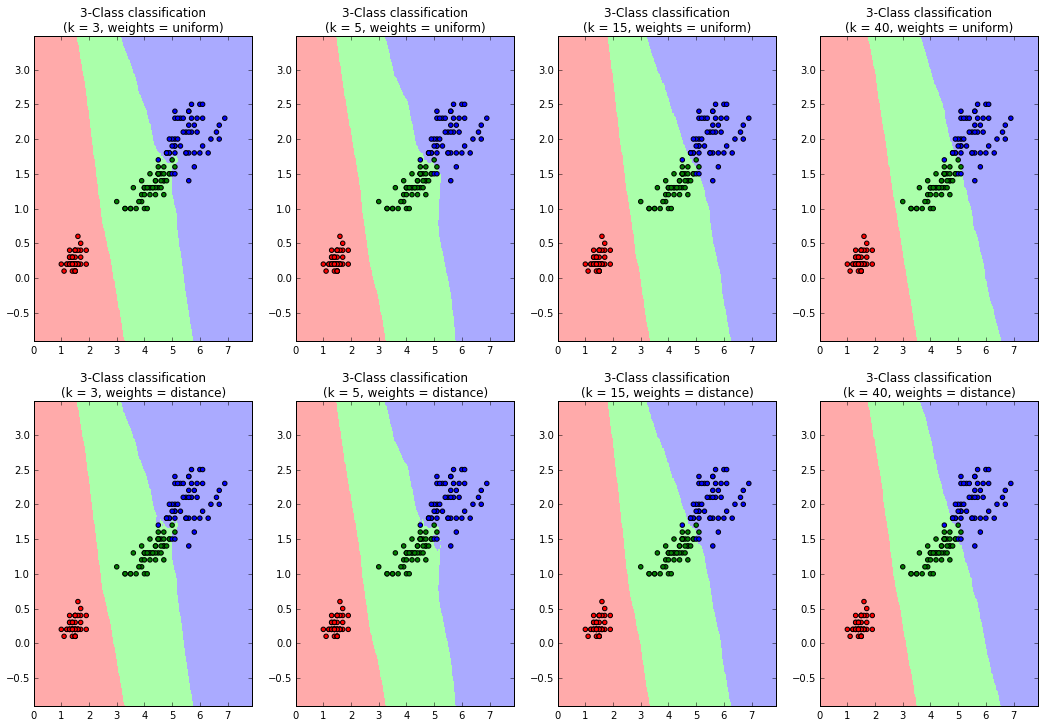

In [65]:
from matplotlib.colors import ListedColormap

# Change plot size
plt.rcParams["figure.figsize"] = (18.0, 12.0)

# Set nearest neighbors amount values
k_neighbors = (3, 5, 15, 40)

# We will only take the last two features - petal width and length 
X = iris.data[:, 2:]  
y = iris.target

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['red', 'green', 'blue'])

i = 1  # subplot number
for weights in ('uniform', 'distance'):
    for k in k_neighbors:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(k, weights=weights).fit(X, y)
        
        plt.subplot(2, 4, i)
        
        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
        pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        pred = pred.reshape(xx.shape)
        plt.pcolormesh(xx, yy, pred, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification \n(k = {0}, weights = {1})".format(k, weights))
        
        i += 1

plt.show()

---
# Naive Bayes

Naive Bayes classification is a simple, yet effective algorithm. It's commonly used in things like text analytics and works well on both small datasets and massively scaled out, distributed systems.

Naive Bayes is based on, you guessed it, Bayes' theorem that provides a way of calculating the posterior probability, $P(c|x)$, from $P(c)$, $P(x)$, and $P(x|c)$. Naive Bayes classifier assume that the effect of the value of a predictor $(x)$ on a given class $(c)$ is independent of the values of other predictors. This assumption is called class conditional independence.

<img src="images/bayes.png">

$P(c|x)$ is the posterior probability of class (target) given predictor (attribute). 
$P(c)$ is the prior probability of class. 
$P(x|c)$ is the likelihood which is the probability of predictor given class. 
$P(x)$ is the prior probability of predictor.

Naive Bayes is a great choice for document classification because it's pretty fast, it can handle a large number of features (i.e. words), and it's actually really effective. Take a look at what happens when you do some basic benchmarking between Naive Bayes and other methods like SVM and RandomForest against the [20 Newsgroups dataset](http://qwone.com/~jason/20Newsgroups/).

In [66]:
# Load dataset
# (!) This could take some time, especially if sklearn has to download the 14MB dataset from the Internet
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')
print news.keys()

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']


In [67]:
print "News categories:\n", news.target_names
print "Articles amount:", len(news.data)
print "Labels amount", len(news.target)
print "Description:", news.description

News categories:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Articles amount: 18846
Labels amount 18846
Description: the 20 newsgroups by date dataset


In [68]:
# Let's see how any arcticle looks
print "An article:\n" + "-"*50 + "\n", news.data[0]
print "-"*50 + "\nLabel: {}, Category: {}.".format(news.target[0], news.target_names[news.target[0]])

An article:
--------------------------------------------------
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


----------------------------------

The test data (a sequence of symbols) cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

* tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
* counting the occurrences of tokens in each document.
* normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.

scikit-learn provides three main models which supports above properties:

* **Common Vectorizer:**

[`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) implements both tokenization and occurrence counting in a single class; it converts a collection of text documents to a matrix of token counts. This approach is called a **Bag-of-words**. The Bag-of-words model learns a vocabulary from all of the documents, then models each document by counting the number of times each word appears. For example, consider the following two sentences:

    Sentence 1: "The cat sat on the hat"

    Sentence 2: "The dog ate the cat and the hat"

From these two sentences, our vocabulary is as follows:

    { the, cat, sat, on, hat, dog, ate, and }

To get our bags of words, we count the number of times each word occurs in each sentence. In `Sentence 1`, "the" appears twice, and "cat", "sat", "on", and "hat" each appear once, so the feature vector for `Sentence 1` is:

    { the, cat, sat, on, hat, dog, ate, and }

    Sentence 1: { 2, 1, 1, 1, 1, 0, 0, 0 }

Similarly, the features for `Sentence 2` are: 

    Sentence 2: { 3, 1, 0, 0, 1, 1, 1, 1}
    
<img src="images/bag-of-words.png" width=75%>
    
This vector representation does not preserve the order of the words in the original sentences. This kind of representation has several successful applications, for example email filtering. Usually the words can be alphabetically ordered before.

Let's demonstrate how `CountVectorizer` vectorizes above sentences

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer takes a list of sentences for fitting
sentences = ["The cat sat on the hat".lower(), "The dog ate the cat and the hat".lower()]

# Creating the bag-of-words
vectorizer = CountVectorizer()

# fit_transform() does two functions: 
# first, it fits the model and learns the vocabulary; 
# second, it transforms our training data into feature vectors. 
# The input to fit_transform should be a list of strings.
data_features = vectorizer.fit_transform(sentences)

# Look at the collection of all words in `sentences`
print "Unique words ({}):".format(len(vectorizer.get_feature_names()))
print vectorizer.get_feature_names()

# Numpy arrays are easy to work with, so convert the result to an array
data_features = data_features.toarray()

print "Data features size:", data_features.shape
print "Vector representation of sentences:\n"
for num, vec in enumerate(data_features):
    print sentences[num], '\n', vec

Unique words (8):
[u'and', u'ate', u'cat', u'dog', u'hat', u'on', u'sat', u'the']
Data features size: (2, 8)
Vector representation of sentences:

the cat sat on the hat 
[0 0 1 0 1 1 1 2]
the dog ate the cat and the hat 
[1 1 1 1 1 0 0 3]


* **Tf–idf term weighting:**

Large text documents contains some words (e.g. “the”, “a”, “is” in English) which are often met but carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms. Tf–idf transform represents the production of _**t**erm **f**requency_ (the number of times that a term $X$ occurs in the document) on the _**i**nverse **d**ocument **f**requency_ (the ratio of the total number of documents by the number of documents containing the term $X$):

    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

    IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

    TF_IDF(t) = TF(t) * IDF(t)

For above two sentences `"The cat sat on the hat"` and `"The dog ate the cat and the hat"` tf-idf values are calculating as follows:

    Sentence 1: "The cat sat on the hat"
    
|term `t`|`F(t)`|`doc_total`|`TF(t) = F(t)/doc_total`|`N`|`D(t)`|`log_e(N/D(t))`|`TF_IDF(t) = TF(t) * IDF(t)`|
|-----|-----|-----|-----|-----|-----|-----|-----|
|the|2|6|0.333|2|2|0|0|
|cat|1|6|0.167|2|2|0|0|
|sat|1|6|0.167|2|1|0.693|0.116|
|on|1|6|0.167|2|1|0.693|0.116|
|hat|1|6|0.167|2|2|0|0|

    Sentence 2: "The dog ate the cat and the hat"
    
|term `t`|`F(t)`|`doc_total`|`TF(t) = F(t)/doc_total`|`N`|`D(t)`|`log_e(N/D(t))`|`TF_IDF(t) = TF(t) * IDF(t)`|
|-----|-----|-----|-----|-----|-----|-----|-----|
|the|3|8|0.25|2|1|0|0|
|dog|1|8|0.125|2|1|0.693|0.087|
|ate|1|8|0.125|2|1|0.693|0.087|
|cat|1|8|0.167|2|2|0|0|
|and|1|8|0.125|2|1|0.693|0.087|
|hat|1|8|0.167|2|2|0|0|

where `F(t)` is the number of times the word (term) `t` appears in the sentence (document), `doc_total` is total number of terms in the sentence, `N` is the total number of sentences (documents) and `D(t)` is the number of documents with term `t` in it.

The normalization is implemented by the [`TfidfTransformer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) class. [`TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) that combines all the options of CountVectorizer and TfidfTransformer in a single model.

It was the simplest representation of tf-idf algorithm. Usally some [weighted schemes](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) are used instead, that allows getting a better accuracy in machine learning algorithms. sklearn's `TfidfVectorizer` also uses a weighted scheme, that's why the below values are others. 

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

data_features = vectorizer.fit_transform(sentences)

# Look at the collection of all words in `sentences`
print "Unique words ({}):".format(len(vectorizer.get_feature_names()))
print vectorizer.get_feature_names()

# Numpy arrays are easy to work with, so convert the result to an array
data_features = data_features.toarray()

print "Data features size:", data_features.shape
print "Vector representation of sentences:\n"
for num, vec in enumerate(data_features):
    print sentences[num], '\n', vec

Unique words (8):
[u'and', u'ate', u'cat', u'dog', u'hat', u'on', u'sat', u'the']
Data features size: (2, 8)
Vector representation of sentences:

the cat sat on the hat 
[ 0.          0.          0.31701073  0.          0.31701073  0.44554752
  0.44554752  0.63402146]
the dog ate the cat and the hat 
[ 0.34161973  0.34161973  0.24306525  0.34161973  0.24306525  0.          0.
  0.72919575]


With the help of [`TfidfTransformer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) we can easily change `CountVectorizer`'s text vectors to tf-idf vectorization, i.e. `TfidfVectorizer` that combines all the options of `CountVectorizer` and `TfidfTransformer` in a single model

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer()
data_features = vectorizer.fit_transform(sentences).toarray()

print "Data features size:", data_features.shape
print "Vector representation of sentences:\n"
for num, vec in enumerate(data_features):
    print sentences[num], '\n', vec
    
transformer = TfidfTransformer()
transformed_data_features = transformer.fit_transform(data_features).toarray()  

print "Transformed data features size:", data_features.shape
print "Vector representation of sentences:\n"
for num, vec in enumerate(transformed_data_features):
    print sentences[num], '\n', vec

Data features size: (2, 8)
Vector representation of sentences:

the cat sat on the hat 
[0 0 1 0 1 1 1 2]
the dog ate the cat and the hat 
[1 1 1 1 1 0 0 3]
Transformed data features size: (2, 8)
Vector representation of sentences:

the cat sat on the hat 
[ 0.          0.          0.31701073  0.          0.31701073  0.44554752
  0.44554752  0.63402146]
the dog ate the cat and the hat 
[ 0.34161973  0.34161973  0.24306525  0.34161973  0.24306525  0.          0.
  0.72919575]


* **Hashing trick using:**

The work with large dataset of text documents creates the large problem with usage memory. The combining the “hashing trick” and the text preprocessing and tokenization features of the `CountVectorizer` allows overcoming these limitations. This combination is implementing in [`HashingVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html#sklearn.feature_extraction.text.HashingVectorizer).
Please, read the official documentation for more details.

`MultinomialNB` classifier is one of the best classifiers for work with textes. Let's demonstrate its usage on the "fetch_20newsgroups"

In [72]:
from sklearn.naive_bayes import MultinomialNB 

# Define vectorizer
vectorizer = TfidfVectorizer()

# Apply vectorization algorithms to the text data
X_train = vectorizer.fit_transform(news.data[2:])
# transform method of TfidfVectorizer update trained vectorizer with the test data
X_test  = vectorizer.transform(news.data[:2])
y_train = news.target[2:]
y_test  = news.target[:2]
print y_train
print y_test
print X_train[0]
print "Train: {} documents.".format(X_train.shape[0])
print "Test: {} documents.".format(X_test.shape[0])

print "\nThe first document of train dataset:"
print news.data[0]

print "Respective coding sparse matrix:"
print X_train[0].data

# Classification
clf = MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)
    
print "\nAccuracy on training set:"
print clf.score(X_train, y_train)
    
y_pred = clf.predict(X_test)
print y_pred
for i in range(len(y_pred)):
    print "\nPredicted category:", news.target_names[y_pred[i]]
    print "Correct category:  ", news.target_names[y_test[i]]

[17  3  4 ...,  3  1  7]
[10  3]
  (0, 41008)	0.0315027846287
  (0, 138431)	0.0335975173643
  (0, 124904)	0.0520021289297
  (0, 41000)	0.0302858998653
  (0, 49367)	0.051368485865
  (0, 48116)	0.0419347564335
  (0, 155032)	0.0481772627669
  (0, 37791)	0.0287905581255
  (0, 112616)	0.031371563858
  (0, 144438)	0.0306969574201
  (0, 116919)	0.0248809567106
  (0, 142941)	0.0297340818279
  (0, 143565)	0.0244074990271
  (0, 142953)	0.0161368840798
  (0, 38420)	0.0116488003395
  (0, 58306)	0.0255737063614
  (0, 79823)	0.020198243887
  (0, 136416)	0.017567132418
  (0, 164700)	0.0281542283585
  (0, 120535)	0.0118298678661
  (0, 152764)	0.0115007745954
  (0, 75985)	0.00791060203248
  (0, 126337)	0.0366800966637
  (0, 165502)	0.0166587692518
  (0, 129272)	0.0433397270653
  :	:
  (0, 135193)	0.0157268841275
  (0, 162016)	0.0586092345717
  (0, 86318)	0.0110611055708
  (0, 127480)	0.0107910093379
  (0, 117496)	0.0111272069043
  (0, 31049)	0.0324594071352
  (0, 102149)	0.00603194474047
  (0, 84627)	0

Despite on the very high accuracy the seccond article was classified incorrectly (although these two categories "comp.os.ms-windows.misc" and "comp.sys.ibm.pc.hardware" are too similar. It is due to articles contains to many common used words (such as "the", "a", "in", "that", etc.) that create some confusion for classifiers.

Let's to see how we can increase the accuracy using the `TfidfVectorizer` with specific attributes (see below) and verify the correctness of `MultinomialNB` classifier on the two first articles of the dataset. 

Let's import a stop word list from the [`Python NLTK`](http://www.nltk.org/). You need to install the data packages that come with it, as follows:

In [73]:
import nltk

# Download stop words.
# You need download it only once.
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
# Import the stop word list
from nltk.corpus import stopwords 

print "Stop words:"
stop_words = stopwords.words("english") 
print len(stop_words), '\n', stop_words

Stop words:
179 
[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any

The default regular expression: `r"\b\w\w+\b"` considers alphanumeric characters and the underscore. Perhaps also considering the slash and the dot could improve the tokenization, and begin considering tokens as Wi-Fi and site.com. The new regular expression could be: `r"\b[a-z0-9-.]+[a-z][a-z0-9-.]+\b"`. 

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define vectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, token_pattern=ur"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")

# Apply vectorization algorithms to the text data
X_train = vectorizer.fit_transform(news.data[2:])
X_test  = vectorizer.transform(news.data[:2])
y_train = news.target[2:]
y_test  = news.target[:2]

clf = MultinomialNB()
clf.fit(X_train, y_train)
    
print "Accuracy on training set:"
print clf.score(X_train, y_train)
    
y_pred = clf.predict(X_test)
for i in range(len(y_pred)):
    print "Predicted category:", news.target_names[y_pred[i]]
    print "Correct category:  ", news.target_names[y_test[i]]

Accuracy on training set:
0.948471662068
Predicted category: rec.sport.hockey
Correct category:   rec.sport.hockey
Predicted category: comp.sys.ibm.pc.hardware
Correct category:   comp.sys.ibm.pc.hardware


Oh, great! How perfect result.

[`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) Naive Bayes classifier possesses by an additive smoothing parameter `alpha`, which well-chosen value can also increase the accuracy of algorithm. Of course, we can choise many times various values of `alpha` and in this way find its the best value. But it would be fine to shift this work on a computer.

[`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) sklearn's class is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. The beauty is that it can work through many combinations in only a couple extra lines of code.
To use it we need only define the wished classifier and set a dictionary of the parameters and the possible values they may take.

Let's look an example (it may require up to ten-twenty minutes for work)

In [76]:
from sklearn.grid_search import GridSearchCV

# Set 5 values of `alpha` amoung which we will choise the best one
parameters = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]}

mnb = MultinomialNB()

# Define the set (grid) of MultinomialNB classifiers with various values of `alpha`
grid_clf = GridSearchCV(mnb, parameters)
grid_clf.fit(X_train, y_train)

# `grid_scores_` attribute of `GridSearchCV` instance contains scores for all parameter combinations in param_grid. 
# Each entry corresponds to one parameter setting. Each named tuple has the attributes:
# - `parameters`, a dict of parameter settings
# - `mean_validation_score`, the mean score over the cross-validation folds
# - `cv_validation_scores`, the list of scores for each fold
print "grid_scores_:", grid_clf.grid_scores_

# `best_estimator_` attribute gives the estimator which gave highest score on the left out data
print "\nbest_estimator_:", grid_clf.best_estimator_ 

# `best_score_` attribute returns the score of the `best_estimator_` on the left out data.
print "\nbest_score_:", grid_clf.best_score_ 

# `best_params_` attribute returns the dictionary with parameters that gave the best results on the hold out data.
print "\nbest_params_:", grid_clf.best_params_ 

grid_scores_: [mean: 0.90941, std: 0.00418, params: {'alpha': 0.0001}, mean: 0.91249, std: 0.00404, params: {'alpha': 0.0005}, mean: 0.91424, std: 0.00400, params: {'alpha': 0.001}, mean: 0.91653, std: 0.00462, params: {'alpha': 0.005}, mean: 0.91711, std: 0.00437, params: {'alpha': 0.01}, mean: 0.91233, std: 0.00284, params: {'alpha': 0.05}, mean: 0.90772, std: 0.00421, params: {'alpha': 0.1}, mean: 0.89084, std: 0.00386, params: {'alpha': 0.5}, mean: 0.88001, std: 0.00233, params: {'alpha': 1}, mean: 0.86611, std: 0.00063, params: {'alpha': 2}, mean: 0.84234, std: 0.00283, params: {'alpha': 5}, mean: 0.82106, std: 0.00346, params: {'alpha': 10}, mean: 0.79505, std: 0.00165, params: {'alpha': 20}, mean: 0.75090, std: 0.00254, params: {'alpha': 50}, mean: 0.69630, std: 0.00349, params: {'alpha': 100}]

best_estimator_: MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

best_score_: 0.917108894078

best_params_: {'alpha': 0.01}


So, let's repeat above classification with a special TfidfVectorizer with found the best value of `alpha` attribute 

In [77]:
vectorizer = TfidfVectorizer(stop_words=stop_words, token_pattern=ur"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")

X_train = vectorizer.fit_transform(news.data[2:])
X_test  = vectorizer.transform(news.data[:2])
y_train = news.target[2:]
y_test  = news.target[:2]

clf = MultinomialNB(alpha=grid_clf.best_params_['alpha'])
clf.fit(X_train, y_train)
    
print "Accuracy on training set:"
print clf.score(X_train, y_train)
    
y_pred = clf.predict(X_test)
for i in range(len(y_pred)):
    print "Predicted category:", news.target_names[y_pred[i]]
    print "Correct category:  ", news.target_names[y_test[i]]

Accuracy on training set:
0.996019953301
Predicted category: rec.sport.hockey
Correct category:   rec.sport.hockey
Predicted category: comp.sys.ibm.pc.hardware
Correct category:   comp.sys.ibm.pc.hardware


We were able to increase the last score on about 5% and it's equlat almost to 1 now. It's really nice result. 

It would be nice to know what words plaid the major role in the determining of the category for each article (remind, we are interested only in the two articles for testing). 

In [78]:
# Define the function which will get top `top_n` tfidf values in row
# and return them with their corresponding feature names
# Note, features_name can be obtained by `get_feature_names()`
def top_tfidf_feats(row, features, top_n=25):
    # `row` is a row of the sparse matrix
    # Sort indexes of the `row` in descending order and take first `top_n` of them
    top_n_ids = np.argsort(row)[::-1][:top_n]
    # Extract feature name and its tfidf value
    top_feats = [(features[i], row[i]) for i in top_n_ids]
    # Create a DataFrame
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

# Define the function that return 
# the top tfidf features in specific document (matrix row) signed as `row_id`
def top_feats_in_doc(X, features, row_id, top_n=25):
    # Remove single-dimensional entries from the shape of an array
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

# Display words for the first article
doc0 = top_feats_in_doc(X_test, vectorizer.get_feature_names(), 0)
doc0

,feature,tfidf
0,pens,0.569864
1,jagr,0.226532
2,devils,0.187555
3,bit,0.176564
4,fun,0.162216
5,fans,0.161702
6,regular,0.159341
7,season,0.152696
8,pulp,0.146183
9,bashers,0.146183


Let's visualize main words for both documents as `matplotlib` `barh` charts.

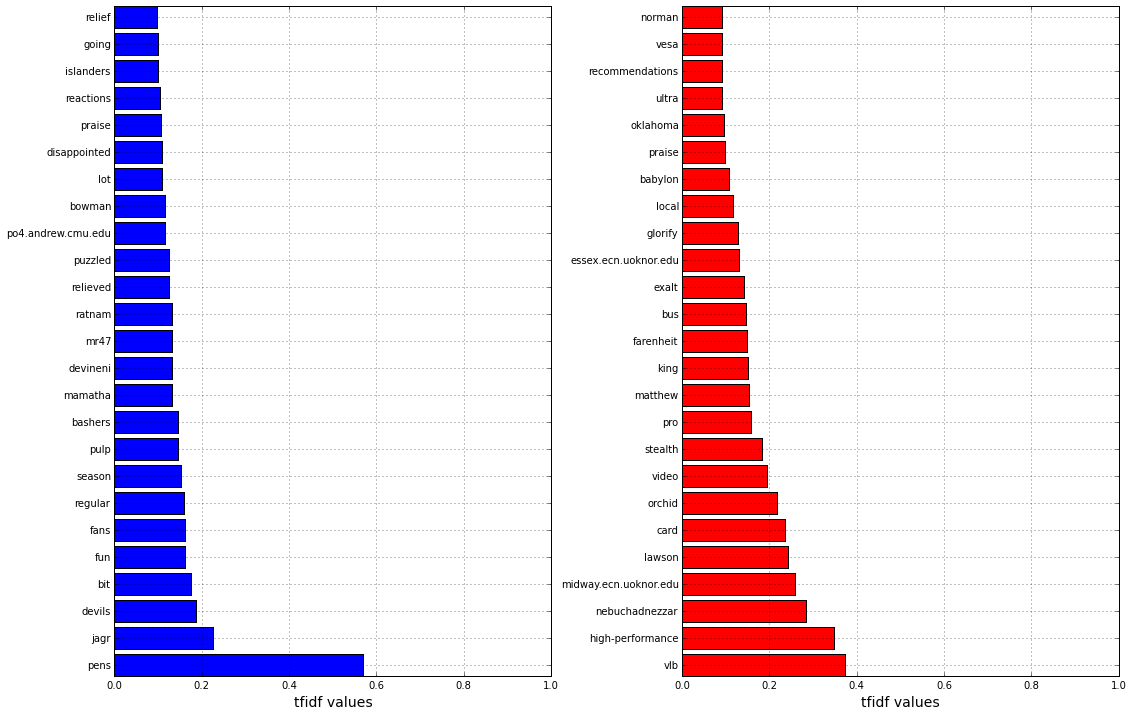

In [79]:
x = np.arange(doc0.index.size)

plt.rcParams["figure.figsize"] = (18.0, 12.0)

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.3)
plt.barh(x, doc0.tfidf, align='center')
plt.yticks(x, doc0.feature)
plt.xlabel('tfidf values', size=14)
plt.axis('tight')
plt.xlim(0, 1)
plt.grid(True)

# Display words for the second article
doc1 = top_feats_in_doc(X_test, vectorizer.get_feature_names(), 1)
doc1

plt.subplot(1, 2, 2)
plt.barh(x, doc1.tfidf, align='center', color='r')
plt.yticks(x, doc1.feature)
plt.xlabel('tfidf values', size=14)
plt.axis('tight')
plt.xlim(0, 1)
plt.grid(True)

plt.show()

> ### Exercise 1.1:

> Documents classification is a fundamental machine learning task. It is used for all kinds of applications, like filtering spam, routing support request to the right support rep, language detection, genre classification, sentiment analysis, and many more. 

> In this task you need to build a simple spam filter using scikit-learn classifiers and vectorizers. Spam filtering is kind of like the "Hello world" of document classification. It's a binary classification problem: either spam, or not spam (a.k.a ham). Thus, you are limited to two classes: spam and ham.

> We're going to use a combination of the [Enron-Spam (in raw form)](http://www.aueb.gr/users/ion/data/enron-spam/) data sets and the [SpamAssassin public corpus](https://spamassassin.apache.org/publiccorpus/) containing spam and ham letter. 

> Both datasets are publicly available for download. We combine files from these dataset and divide them on train part (are available in `"data/spam_ham_train"` folder) and test part (`"data/spam_ham_test"` folder) on the Virtual Machine.

> **1\.** Read all files from the folder `"data/spam_ham_train"` and write its content to two Python lists `X_train` (here all files content should be written (text of one file is an element of this list)) and `y_train` (this list should contain labels 0 and 1 defining whether the file contains spam (binary label 1) or not spam (binary label 0) for respective file from `X_train`). You may read these files to a pandas DataFrame if you want. As you can see the `X_train` contains all ham files at the begin and then all spam files follow. This order is not good, because it makes some confusions for ML classifiers and descreases the score. The best practice is to shuffle data in train dataset. Please do this using `random` or `numpy` Python libraries, for example. These links https://docs.python.org/2/library/random.html#random.shuffle, http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.random.permutation.html, http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.random.shuffle.html may be helpful for you.

> **2\.** Each (or almost each) files in the `"data/spam_ham_train"` folder represents a HTML page. So, they contains too many words or charachters, that play the role of some noice for a classifier. Let's clear spam/ham letters content:

> * lowercase text and remove enters and tabs if any
> * remove all HTML tags; you may use Python module [`re`](https://docs.python.org/2/library/re.html) here
> * remove all non-letters
> * remove extra spaces (it isn't required)
> * remove stop words from "words" and single letters

> After all above transformations on text write result to the `X_train_clear` Python list.

> **3\.** Create a `TfidfVectorizer` instance, call it `tfidf_vectorizer` and set the `encoding` attribute as follows `tfidf_vectorizer = TfidfVectorizer(encoding='latin1')` (we set `encoding='latin1'` because the most part of letters has this coding; you may also add some other setups) and fit vectorizer with `X_train`.

> **4\.** Create a new `TfidfVectorizer` `tfidf_vectorizer_clear` and fit it with the `X_train_clear` data.

> **5\.** In this exercise we will evaluate the accuracy of your model. Take two classifiers `MultinomialNB` we have used above and [`SGDClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html), the regularized linear model with stochastic gradient descent (SGD) learning that is often used in text classification problems and give also very high accuracy. Train these two classifiers on both datasets `X_train` and `X_train_clear` and select those which gives the higher score. Call this classifier as the `best_clf` and the used at this `TfidfVectorizer` as `best_tfidf_vectorizer`. Note, you may set various attributes for classifiers to reach a better accuracy. Use `GridSearchCV` for this.

> **6\.** Read the test data (that don't have any spam/ham labels) from the `"data/spam_ham_test"` folder as it was done before (including text clearing if it is necessarily), write resul to `X_test` and update `best_tfidf_vectorizer` terms dictionary using [`transform`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.transform) method. Based on vectorized test data find predicted classes using `predict` method and write result to the `predictions` variable.

> Pay attention, the index of each label in `predictions` corresponds to the name of file in the `"data/spam_ham_test"` directory minus 1, i.e. the predicted label (0 or 1) for the file "0001.txt" should be done as first element of the `predictions` array (index` = 0`), for the file "0002.txt" the label should be positioned as the second element and so on.   

> For this array we will calculate the accuracy of your model based on comparison of correct labels for test data and your predicted labels (it may differs from the accuracy obtained with `score` method).

In [80]:
# type your code here
from sklearn.tree import DecisionTreeClassifier
from os.path import exists 
import os
import io
import glob
import email
import glob
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
# pydot module provides with a full interface to create handle modify and process graphs in Graphviz’s dot language
import pydot

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Download stop words.
# You need download it only once.
nltk.download("stopwords")

# Import the stop word list
from nltk.corpus import stopwords 

#print "Stop words:"
stop_words = stopwords.words("english") 
#print len(stop_words), '\n', stop_words
from sklearn.naive_bayes import MultinomialNB 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import SelectKBest, f_regression

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
work_dir_1 = "data/spam_ham_train/ham"
work_dir_2 = "data/spam_ham_train/spam"
work_dir_3 = "data/spam_ham_test"

X_test = []
X_train = []
y_train = []
X_train_clear = []
X_test_clear = []

for path in glob.glob(os.path.join(work_dir_1, "*.eml")):
    with io.open(path, mode="rb") as fd:
        content = fd.read()
        text = str(email.message_from_string(content).get_payload()).replace("\n","").replace("\'","'")

    X_train.append(content)
    X_train_clear.append(text)
    y_train.append(0)

for path in glob.glob(os.path.join(work_dir_2, "*.eml")):
    with io.open(path, mode="rb") as fd:
        content = fd.read()
        text = str(email.message_from_string(content).get_payload()).replace("\n","").replace("\'","'")
        
    X_train.append(content)
    X_train_clear.append(text)
    y_train.append(1)

for path in glob.glob(os.path.join(work_dir_3, "*.txt")):
    with io.open(path, mode="rb") as fd:
        text = fd.read()
    
    X_test.append(text)
    X_test_clear.append(text)

    
#X_train = np.array(X_train).reshape(-1, 1)
#y_train = np.array(y_train).reshape(1, -1)
#X_test = np.array(X_test).reshape(-1, 1)

#X_train = pd.DataFrame(X_train)
#X_train_clear = pd.DataFrame(X_train_clear)
#X_test = pd.DataFrame(X_test)
#y_train = pd.DataFrame(y_train)
#y_test = pd.DataFrame(y_test)
    
    
print len(X_train),len(X_train_clear),len(X_test),len(y_train)
#print y_train[:3],len(y_train),y_train[-3:],X_train_clear[:1],X_test[:1]
#print X_train.shape, X_test.shape, y_train.shape#, y_test.shape        

# Import the stop word list
from nltk.corpus import stopwords 

print "Stop words:"
stop_words = stopwords.words("english") 
    
tfidf_vectorizer = TfidfVectorizer(encoding='latin1')
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)
#y_train = tfidf_vectorizer.fit_transform(y_train)

tfidf_vectorizer_clear = TfidfVectorizer(stop_words=stop_words,encoding='latin1')
X_train_clear = tfidf_vectorizer_clear.fit_transform(X_train_clear)
X_test_clear = tfidf_vectorizer_clear.transform(X_test_clear)



#print y_train[:3]
#print X_train_clear[0:2]

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print mnb.score(X_train, y_train)

sgd = SGDClassifier()
sgd.fit(X_train,y_train)
print sgd.score(X_train, y_train)

mnb = MultinomialNB()
mnb.fit(X_train_clear,y_train)
print mnb.score(X_train_clear, y_train)

sgd = SGDClassifier()
sgd.fit(X_train_clear,y_train)
print sgd.score(X_train_clear, y_train)

best_clf = SGDClassifier()
best_clf.fit(X_train_clear, y_train)
best_clf.score(X_train_clear, y_train)
best_tfidf_vectorizer = TfidfVectorizer()

predictions = best_clf.predict(X_test_clear)
print predictions
print best_clf.score(X_test_clear, predictions)
# X_train = ...

# y_train = ...

# X_train_clear = ...

# best_clf = ...

# best_tfidf_vectorizer = ...

# X_test = ...

# predictions = ...

7766 7766 1498 7766
Stop words:
0.960597476178
1.0
0.961756373938
0.999227401494
[1 1 1 ..., 1 1 0]
1.0


In [82]:
from test_helper import Test

Test.checkClassifier(best_clf, best_tfidf_vectorizer, "Incorrect predictions. You model works improperly", 
                     "Exercise 1.1.1 is successfull")
Test.accuracy_scoreSpamHam1(predictions, "The value of sklearn.metrics.accuracy_score is less than 0.75", 
                     "Exercise 1.1.2 is successfull")
Test.accuracy_scoreSpamHam2(predictions, "The value of sklearn.metrics.accuracy_score is less than 0.9", 
                     "Exercise 1.1.3 is successfull")
Test.accuracy_scoreSpamHam3(predictions, "The value of sklearn.metrics.accuracy_score is less than 0.95", 
                     "Exercise 1.1.4 is successfull")
Test.accuracy_scoreSpamHam4(predictions, "The value of sklearn.metrics.accuracy_score is less than 0.975", 
                     "Exercise 1.1.5 is successfull")
Test.accuracy_scoreSpamHam5(predictions, "The value of sklearn.metrics.accuracy_score is less than 0.9875", 
                     "Exercise 1.1.6 is successfull")

1 test failed. Incorrect predictions. You model works improperly
1 test failed. Incorrect amount of predicted labels
1 test failed. Incorrect amount of predicted labels
1 test failed. Incorrect amount of predicted labels
1 test failed. Incorrect amount of predicted labels
1 test failed. Incorrect amount of predicted labels


---
# Ensemble methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability/robustness over a single estimator. It works by generating multiple classifiers/models which learn and make predictions independently. Those predictions are then combined into a single (mega) prediction that should be as good or better than the prediction made by any one classifer.

**Some commonly used ensemble learning techniques:**

### Bagging:
Bagging tries to implement similar learners on small sample populations and then takes a mean of all the predictions. In generalized bagging, you can use different learners on different population.  As you can expect this helps us to reduce the variance error.

<img src="images/bagging.png">

The `sklearn.ensemble` module includes two averaging algorithms based on randomized decision trees: 

* **the Random Forest algorithm** - each tree is planted & grown as follows:

    * Assume number of cases in the training set is `N`. Then, sample of these `N` cases is taken at random but with replacement. This sample will be the training set for growing the tree.
    * If there are `M` input variables, a number `m<M` is specified such that at each node, `m` variables are selected at random out of the `M`. The best split on these `m` is used to split the node. The value of `m` is held constant while we grow the forest.
    * Each tree is grown to the largest extent possible and  there is no pruning.
    * Predict new data by aggregating the predictions of the ntree trees (i.e., majority votes for classification, average for regression).

* **the Extra-Trees method** (extremely randomized trees) - randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule).

### Boosting: 
Boosting is an iterative technique which adjust the weight of an observation based on the last classification. If an observation was classified incorrectly, it tries to increase the weight of this observation and vice versa. Boosting in general decreases the bias error and builds strong predictive models. However, they may sometimes over fit on the training data.

<img src="images/boosting.png">

* **AdaBoost** - the core principle is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, ..., w_N$ to each of the training samples. Initially, those weights are all set to $w_i = 1/N$, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

* **Gradient Tree Boosting** - is a generalization of boosting to arbitrary differentiable loss functions. Main advantages of GTR are the support of heterogeneous features, high predictive power, etc.

sklearn provides a set of [ensemble methods](http://scikit-learn.org/stable/modules/ensemble.html). We will stop on the three common user classifiers [`RandomForestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`ExtraTreesClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) and [`AdaBoostClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier). They have the same features and methods in general, but work in various ways. Working with them we need to set the `n_estimators` attribute defining the number of trees in the forest or the maximum number of estimators at which boosting is terminated.

Look at which results return the `RandomForestClassifier` on the above test sample for iris dataset

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50).fit(iris.data, iris.target)

# Again test classifier with the same data sample 
X_new = [
    [5.0,  3.6,  1.3,  0.25],   # very similar to the Iris Setosa
    [7.0,  3.0,  5.0,  1.5],   # very similar to the Iris Versicolor
    [6.5,  3.0,  6.2,  2.25],   # very similar to the Iris Virginica
    [3.0,  1.5,  2.5,  1.0]    # length and width parameters are far from each group
]

rf.predict(X_new)

array([0, 1, 2, 1])

Let's find the value of trees in the forrest, which give the highest accuracy, for various ensamble classifiers. Function `train_test_split` select in random way only one pair of test and train datasets. It may exists the situation when the train dataset will contain no one element of some category (or only a few elements) and the test dataset will contain all elements of this category (or almost all). Thus training will not include this category and testing give the very low accuracy. The best practice is divison of the whole dataset onto many random train/test datasets and running classifier (or regressor) on each of them. In this case the current accuracy is the average accuracy of all subprocesseses.

<img src="images/kfold.png">

scikit-learn provides class [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html) (the are some other similar classes; more info you may find [here](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)), which divides all the samples in `k` groups of samples, called _folds_. Called as a generator it returns indexes of items, which were distributed to train and test datasets respectivelly on each iteration.

In [84]:
from sklearn.cross_validation import KFold

# We make 5 distribution of train and test datasets
kf = KFold(len(iris.data), n_folds=5, shuffle=True, random_state=42)
print kf

sklearn.cross_validation.KFold(n=150, n_folds=5, shuffle=True, random_state=42)


In [85]:
# Look at the indeces distribution in train and test datasets
for train_index, test_index in kf:
    print train_index[:15]
    print test_index[:15]
    print

[ 0  1  2  3  4  5  6  7  8 10 11 13 14 15 16]
[ 9 12 18 19 26 29 30 31 36 45 55 56 64 68 69]

[ 1  2  3  5  6  7  8  9 12 13 14 17 18 19 20]
[ 0  4 10 11 15 16 22 27 28 32 40 42 44 51 60]

[ 0  1  2  3  4  6  8  9 10 11 12 13 14 15 16]
[ 5  7 23 24 25 33 34 35 39 43 47 49 53 62 70]

[ 0  1  4  5  7  9 10 11 12 14 15 16 18 19 20]
[ 2  3  6  8 13 17 38 46 50 54 59 61 63 72 79]

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 15 16]
[ 1 14 20 21 37 41 48 52 57 58 71 74 87 88 90]



In [86]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
import pandas as pd

# Divide dataset into train and test parts
X = iris.data  
y = iris.target

results = {"RandomForest": [], "ExtraTrees": [], "AdaBoost": []}
idx = range(1, 51, 2)
for n_est in idx:
    total_scores = {"RandomForest": [], "ExtraTrees": [], "AdaBoost": []}
    for train_index, test_index in kf:
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        
        rf  = RandomForestClassifier(n_estimators=n_est).fit(X_train, y_train)
        et = ExtraTreesClassifier(n_estimators=n_est).fit(X_train, y_train)
        ab = AdaBoostClassifier(n_estimators=n_est).fit(X_train, y_train)
        
        total_scores["RandomForest"].append(rf.score(X_test, y_test))
        total_scores["ExtraTrees"].append(et.score(X_test, y_test))
        total_scores["AdaBoost"].append(ab.score(X_test, y_test))
        
        # The accuracy find using `score` method can be calculated also as following: 
        # preds = rf.predict(X_test)
        # accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(y_test))

        # The same result can be obtained using `accuracy_score` function of `sklearn.metrics` module
        # from sklearn.metrics import accuracy_score
        # accuracy = accuracy_score(y_test, preds)
        
    results["RandomForest"].append(np.mean(total_scores["RandomForest"]))
    results["ExtraTrees"].append(np.mean(total_scores["ExtraTrees"]))
    results["AdaBoost"].append(np.mean(total_scores["AdaBoost"]))
    
results = pd.DataFrame(results, index=idx)
results.head()

,AdaBoost,ExtraTrees,RandomForest
1,0.633333,0.953333,0.933333
3,0.940000,0.946667,0.960000
5,0.960000,0.946667,0.946667
7,0.946667,0.960000,0.953333
9,0.960000,0.960000,0.953333


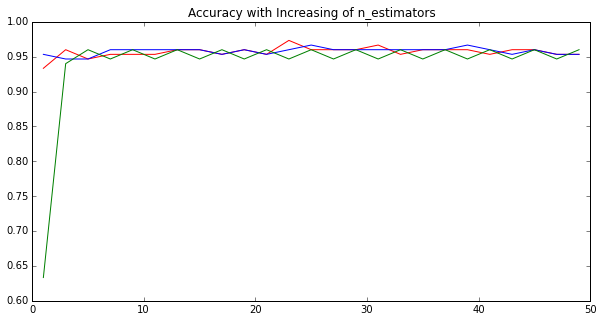

In [87]:
# Change plot size
plt.rcParams["figure.figsize"] = (10.0, 5.0)
plt.plot(results.index.values, results["RandomForest"], color="red")
plt.plot(results.index.values, results["ExtraTrees"], color="blue")
plt.plot(results.index.values, results["AdaBoost"], color="green")
plt.title("Accuracy with Increasing of n_estimators")
plt.show()

As you can see, all these classifiers give good prediction starting from 15-20 trees in the forest. The default values `n_estimators` attribute of various classificators are different. 

Despite on the almost the same accuracy of Random Forest, Extra-Trees and AdaBoost classifiers they define various areas (range for parameters values) and as result define different classification group boundaries. Let's look at this on the example of iris dataset.

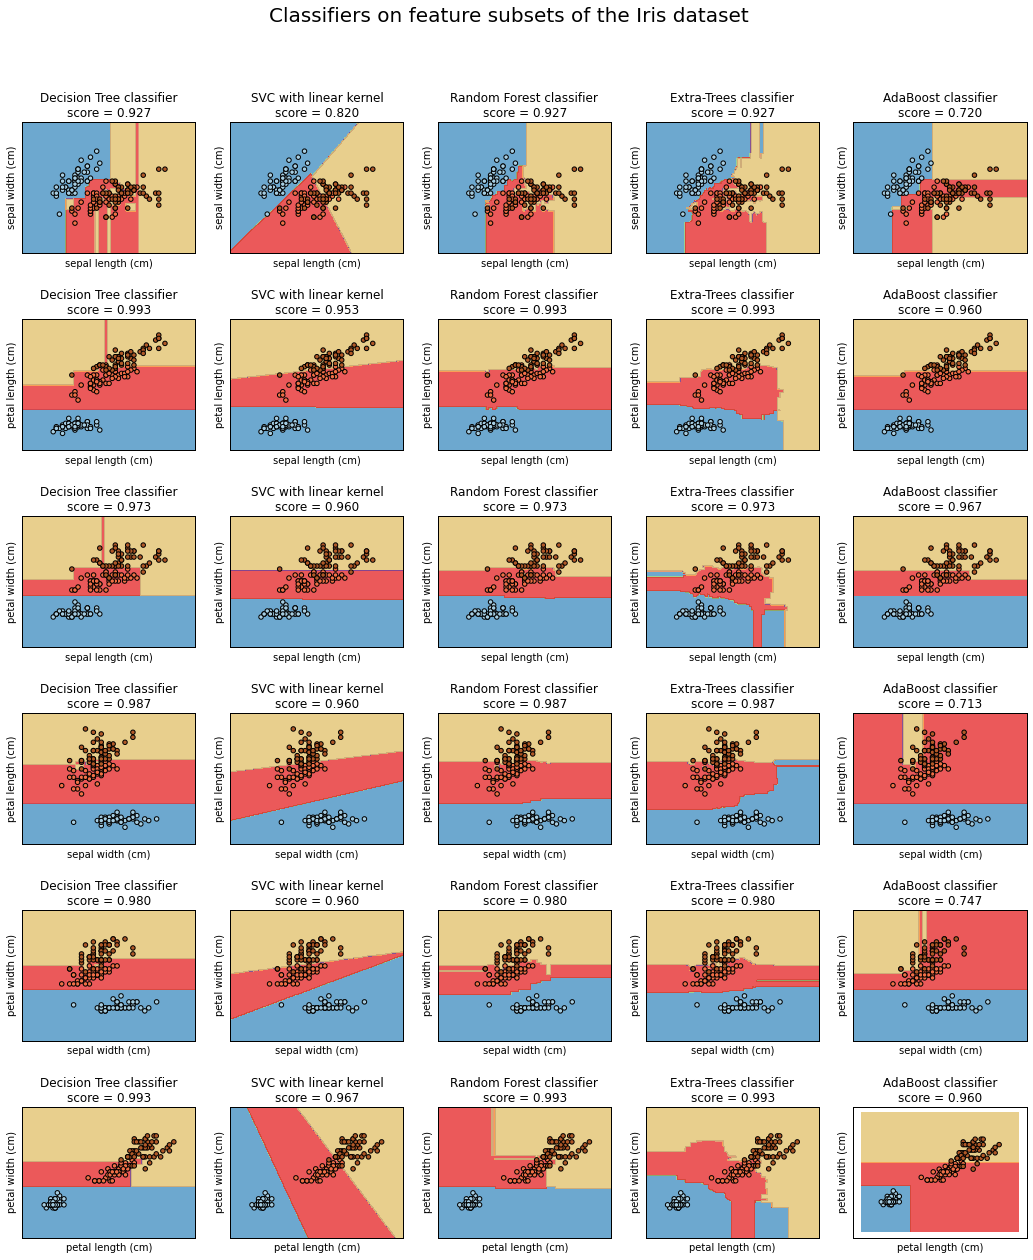

In [88]:
from sklearn.svm import SVC

# title for the plots
titles = [
    'Decision Tree classifier',
    'SVC with linear kernel',
    'Random Forest classifier',
    'Extra-Trees classifier',
    'AdaBoost classifier'
]

plt.rcParams["figure.figsize"] = (18.0, 20.0)
n_est = 30
plot_idx = 1   # set subplot counter
for pair in ([0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]):
    # We will again take only the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    
    # Set classifiers 
    dt = DecisionTreeClassifier()
    svc = SVC(kernel='linear')
    rf = RandomForestClassifier(n_estimators=n_est)
    et = ExtraTreesClassifier(n_estimators=n_est)
    ab = AdaBoostClassifier(n_estimators=n_est)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    for clf in (dt, svc, rf, et, ab):
        clf = clf.fit(X, y)
        scores = clf.score(X, y)
        
        plt.subplot(6, 5, plot_idx)
        plt.subplots_adjust(hspace=0.5)
        
        pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        # Put the result into a color plot
        pred = pred.reshape(xx.shape)
        plt.contourf(xx, yy, pred, cmap=plt.cm.Paired, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[plot_idx % 5 - 1] + "\nscore = {:0.3f}".format(scores))
        
        plot_idx += 1

plt.suptitle("Classifiers on feature subsets of the Iris dataset", size=20)
plt.axis("tight")

plt.show()

As you can see, the ensemble methods give the same (or almost the same) score results for iris dataset (but the ranges of each class are various). For more larger datasets usualy it does not work and forrests of decision trees give more better prediction and accuracy.

---
# Unsupervised Learning

Unsupervised learning is the most applicable subfield on machine learning as _**it does not require any labels in the dataset**_ and world is itself is an abundance of dataset. Human beings and their actions are recorded more and more every day(through photographs in Instagram, health data through wearables, internet activity through cookies and so on). Even the part of our lives which are not digital will be recorded in near future thanks to internet of things. In such a diversified and unlabeled dataset, unsupervised learning will become more and more important in the future.

Suppose, we have given the iris dataset, we knew that there were 3 types of iris, but did not have access to a taxonomist to label them (targets are unavailable). To distribute information on classes we need to split the observations in well-separated group called _clusters_. The simplest clustering algorithm is the k-means ([`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)).

In [89]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

k_means = KMeans(n_clusters=3)
k_means

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [90]:
k_means.fit(X_iris) 
preds = k_means.labels_

# Let's show each fifth label
print "\nPredicted:\n", preds
print "Correct:\n", y_iris


Predicted:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Correct:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


K-means algorithm defines numeric labels for groups which may be not equal to the defined in the iris dataset (1 instead of 0 and vice verse) but it exactly determined that there are three classes of data. Let's calculate the accuracy:  

In [91]:
# `y_iris` contains 50 items for each group.
# Find the group identifier as the most frequent element 
group_0 = preds[:50]
group_1 = preds[50:100]
group_2 = preds[100:150]

group_0_identifier = max(set(group_0), key=list(group_0).count)
group_1_identifier = max(set(group_1), key=list(group_1).count)
group_2_identifier = max(set(group_2), key=list(group_2).count)

print "Groups identifiers:", group_0_identifier, group_1_identifier, group_2_identifier

print "Accuracy:", (np.where(group_0 == group_0_identifier, 1, 0) + \
                    np.where(group_1 == group_1_identifier, 1, 0) + \
                    np.where(group_2 == group_2_identifier, 1, 0)
                   ).sum() / float(len(y_iris))

Groups identifiers: 1 2 0
Accuracy: 0.893333333333


Quite a good result!

Let's visualize obtained clusters and the truth results. 

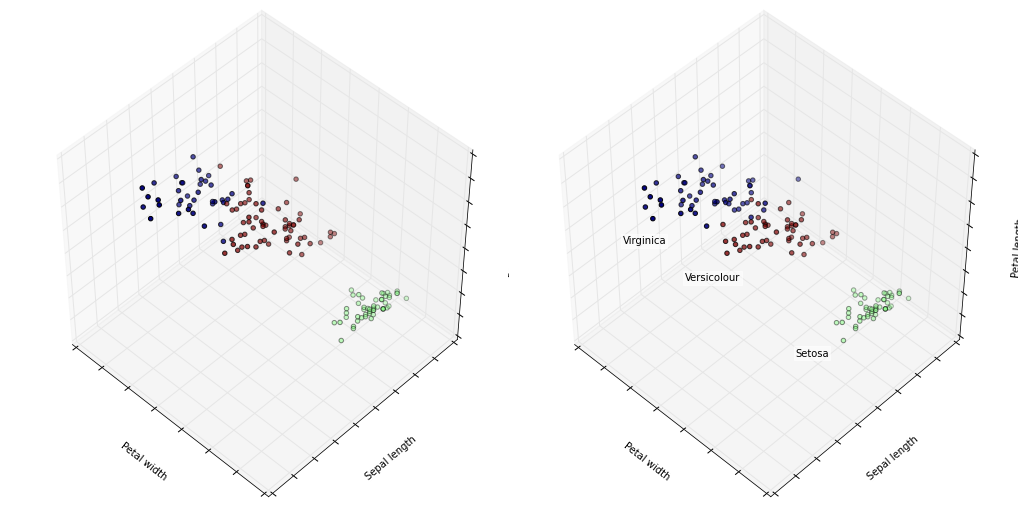

In [92]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (18.0, 9.0)

# Plot predicted with k-means clusters
ax = plt.subplot(1, 2, 1, projection='3d')
plt.subplots_adjust(wspace=0.0)
ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=preds.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
# Rotate plot
ax.view_init(48, 134)
    
# Plot the ground truth
ax = plt.subplot(1, 2, 2, projection='3d')
# Name groups 
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_iris[y_iris == label, 3].mean(),
              X_iris[y_iris == label, 0].mean() + 1.5,
              X_iris[y_iris == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y_iris, [1, 2, 0]).astype(np.float)
ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
# Rotate plot
ax.view_init(48, 134)

plt.show()

Sure, there are many other models of supervised and unsupervised machine learning and we cannot to cover all the material in this lesson. More information you can find on official site of scikit-learn http://scikit-learn.org.

---

# Features normalization

Many classifiers are sensitive to the scale of features. In other words, if we have one attribute with values of `[-10, 5]` and the second feature with values `[0, 10000]`, then the identical percentage error in both features will lead to a large difference in absolute value and qualifier will treat the second feature the more important. The `sklearn.preprocessing` package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

Suppose we have the following train and test datasets:

In [93]:
X_train = [
    [-0.024626, 1174.600238],
    [-0.978058, 1083.198803],
    [0.314272, -1472.977609],
    [0.179752, 231.017267],
    [-1.262544, -778.271726],
    [0.249970, -52.801483],
    [-1.870397, -324.235348],
    [0.020419, -64.744951],
    [0.065806, -421.684101],
    [0.638902, -1405.843375]
]
y_train = [0, 1, -1, 0, 1, 0, 1, 1, 1, -1]
X_test  = [
    [1.651437, 1337.453826],
    [-0.866495, 1191.232457],
    [0.789828, -475.647768],
    [0.179549, 1959.095353],
    [-0.434351, 568.504207]
]

Using the simplest linear classifier [`Perceptron`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) let's classify the test data

In [94]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf.fit(X_train, y_train) 
print clf.score(X_train, y_train) 
print clf.predict(X_test)

0.4
[ 0  0 -1  0  0]


We obtained too low accuracy. Let's try increase it with the help of data normalization/standardization. `scikit-learn` provides many tools of data standardization and preprocessing, one of the most common used is [`sklearn.preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) that standardizes features by removing the mean and scaling to unit variance.

The following example help you to see how it works

In [95]:
from sklearn.preprocessing import StandardScaler

st_sc = StandardScaler()
# Standardizes train features 
X_train_scaled = st_sc.fit_transform(X_train)
# Standardizes test features
# Note, the method fit_transform works with train data as well as the method transform deals with test data.
X_test_scaled  = st_sc.transform(X_test)

print "X_train_scaled:\n", X_train_scaled
print "X_test_scaled:\n", X_test_scaled

X_train_scaled:
[[ 0.31389184  1.61976055]
 [-0.92265507  1.51230578]
 [ 0.75342321 -1.49282591]
 [ 0.57895844  0.51045093]
 [-1.29161718 -0.67610502]
 [ 0.67002718  0.17678354]
 [-2.07996783 -0.14232375]
 [ 0.37231263  0.16274237]
 [ 0.43117698 -0.25688796]
 [ 1.17444979 -1.41390052]]
X_test_scaled:
[[ 2.48764991  1.811217  ]
 [-0.77796422  1.63931398]
 [ 1.3701922  -0.32032956]
 [ 0.57869516  2.54204084]
 [-0.21749811  0.90721255]]


Look at which the average value and the variance of the scaled train dataset are

In [96]:
print "average:", X_train_scaled.mean()
print "standard deviation:", X_train_scaled.std()
print "variance", X_train_scaled.var()

average: 3.33066907388e-17
standard deviation: 1.0
variance 1.0


and how the score of the `Perceptron` classifier changed after data scaling 

In [97]:
clf_scaled = Perceptron()
clf_scaled.fit(X_train_scaled, y_train) 
print clf.score(X_train_scaled, y_train) 
print clf.predict(X_test_scaled)

0.8
[ 0  0 -1  0  0]


So, the predicted labels remain the same, but the score increased two times. It's very great result, isn't it?

> ### Exercise 1.2:

> The following task was proposed in https://www.kaggle.com. Here is its description:

> <span style="color: #6E6E6E">**The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.**</span>

> <span style="color: #6E6E6E">**One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.**</span>

> <span style="color: #6E6E6E">**In this contest, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.**</span>

> We have slightly changed the dataset provided by https://www.kaggle.com, particarly we changed persons names, swap their surnames without loosing of any regularity and have re-split dataset into train and test parts.

> What you need to do:

> **1\.** Read "data/titanic_train.csv" and "data/titanic_test.csv" files and create two pandas DataFrames `train_df` and `test_df`, respectively. Train dataset contains `Survived` column with labels 0 (died) and 0 (survived). All other fields are features. 

> The description of features in train and test datasets:

> * *PassengerId* - A numerical id assigned to each passenger.
> * *Survived* - Whether the passenger survived (1), or didn't (0). We'll be making predictions for this column.
> * *Pclass* - The class the passenger was in (first class (1), second class (2), or third class (3)).
> * *Name* - The name of the passenger.
> * *Sex* - The gender of the passenger (male or female).
> * *Age* - The age of the passenger. Fractional if age is less than unity.
> * *SibSp* - The number of siblings and spouses the passenger had on board.
> * *Parch* - The number of parents and children the passenger had on board.
> * *Ticket* - The ticket number of the passenger.
> * *Fare* - How much the passenger paid for the ticker (in Pre-1970 British pounds).
> * *Cabin* - Which cabin the passenger was in.
> * *Embarked* - Where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).
> * *Boat* - The number of lifeboat.
> * *Body* - The body identification number.
> * *Home/Dest* - Home/destination.

> **2\.** Analyse the train dataset. It should help you to define what features have a larger weight and what to do with bad records in some rows:

> * Display the percentage of empty cell in train and test DataFrames. Thus, you need to build two stacked bar charts (one for the train dataset, save it as "lab5_ex_2_train.png"; the second for test dataset, save it as "lab5_ex_2_test.png") like in the picture below. We will check these two chart except for all others. The amount of not null values of each column should be filled with red color (opacity equlas to 1) and placed in the bottom part of the bar. Top bar's part corresponds to null values (blue color, opacity is also 1). Bars' width is `0.5`. `fontsize=14` for all text labels, except for the plot title "Null values for each column for TRAIN/TEST dataset (percentage of null values is shown)" (remain TRAIN for train dataset and TEST for test dataset) where `fontsize=20` and font is bold. y axis ticks should be 1.3 times greater than dataset elements amount and the distance between neighboring ticks is 100, i.e. you should something like this `plt.yticks(np.arange(0, df.shape[0]*1.3, 100), fontsize=14)`. Numeric labels over each bar represents the percentage of null values in it. Save this values to `train_percentage` and `test_percentage` Python lists. Place them in the middle of a bar and on 10 pixels over the bar, round percents to two numbers after point. Add legend as in the example image, dispose it in the middle of the plot near the left side. Set also `plt.margins(x=0.01)` and `figsize=(18.0, 5.0)`.

> <img src="images/ex5_1.png">

> * Build the distribution (bar chart) of the amounts of people who survived and who did not.

> * Build the distributions (bar charts) of survived and died people by age, passenger class, sex, siblings/spouses and parents/children amounts.

> * Add a new column (feature) to the train and test dataset "AgeCategory" with two values "child" and "adult" for people younger than 10 years (including those who is 10 years old) and older respectively. If the age is unknown set "AgeCategory" equals to "adult" for now. Build a bar chart for survived by these age categories. 

> Try to get plots like these

> <img src="images/ex5_2.png">

> Note, usually the addition of new features improve the accuracy of using model.

> * Build a sequence of lines for age and sex distribution within classes.

> We won't check these plots, but they help you to select informative features and build good model with high predictions.

> **3\.** We have 14 features in the provided dataset. Is it enough? Who knows, perhaps yes. But let's look at the data in columns more attentively: many of them contain disorderly and unstructured data, for example, we have data about siblings and  spouses, parents and children, but maybe it would be nicer to know how many relatives has the person on the board or if it was alone there. Or we have data about the deck level (the letter; the deck A is closer to the upper deck than all others) and cabin number (the number) in "Cabin" column, but here deck level is probably more important information because it shows how far the passenger was from the upper deck, etc. So let's the following features to both train and test datasets

> * Instead of using only of two columns "Parch" & "SibSp", let's add one column "Relatives" representing how many family members a person has aboard. Meaning, if having any family member (parent, brother, ...etc) will increase chances of being survived or not.

> * Add new binary feature "Single" containing data whether the passenger had any family member aboard or not. Let's set 1 if he/she was alone, 0 if he/she has relatives.

> * Cabin contains letter that corresponds to deck level (A is closer to the upper deck than all others, see image below). If the person was on one of the top deck levels, then it has more chanses to go up. Let's add "Deck" column containg this letter. If the letter is unknown write `0` to the respective cell.

> * Separate title (e.g. 'Sir', 'Mrs', 'Ms', 'Mr', 'Dr', etc.) from "Name" column into "Title" column. It may help us in the following steps. All the name in the dataset has the format "Surname, Title. Name". If title is absent, write "U" (Unknown) to the respective cell.

> * Extract surname from the name into "Surname" column. We will use it further at names codding.

> You may also separate (e.g. "Home/Dest" column) or join some other columns data. 

> If you change the order of row, please order them by "PassengerId" in ascending order. It's important for checking of you result in this step.

> Which of them may help you? It's hardly to say now, you need combine them and try various variants.

> <img src="images/titanic.png">

> **4\.** Train dataset contains data about 916 pasangers and 393 rows (without labels) are present in the test dataset. But many of rows contains empty field's values. No one classifier will work good with such data. But if we drop all rows with at least one `NaN` value, we get a few dozen rows in train dataset. It is very small amount for good prediction. That's why we need fill empty values in something way. One of the common used cases is the usage of median value (or average value) of the feature against the `NaN` value. To get more accurate results in median, mean, etc. calculations at first let's <u>join both train and test datasets into one</u> (otherwise, we will neglect with very important information). 

> Moreover, we have non-numerical data in many column. It is not good and classifiers "refuse" to work with such data. That's why with need encode text (or other non-numerical type) to as number. So

> * "Sex" column contains only "male" and "female" values and it is fully filled (no one empty cell). Replace "male" gender to `0` and "female" gender to `1`.

> * In "Embarked" column replace `"S"` to `1`, `"C"` to `2`, `"Q"` to 3 and write `0` if a cell is empty.

> * Change "Deck" values by the following rules: `"A" -> 1, "B" -> 2, "C" -> 3, "D" -> 4, "E" -> 5, "F" -> 6, "G" -> 7, "T" -> 8` and `0` otherwhise.

> * You may replace the empty age values onto the median for respective sex. But it may be done more accurate. The passenger's title should help with differentiation between younger and older men/women. Indeed, a Miss. is usually younger than a Mrs. and a Master is usually younger than a Mr. According to the English honorifics, the title Master is used for young men and boys. Finally, we can also assume that people with the same titles are closer together in age. So, let's fill null values with median for respective "Title" (it should be more better than for only "Sex").

> * After that change `"child"` to `0`, `"adult"` to `1` in the "AgeCategory" column.

> * "Fare"'s empty values we will replace onto median for respective class (because ticket price is significantly different for various classes); 

> * Let's normalize and encode the titles using the following function:

> <span style="margin-left: 30px"></span>`def replace_titles(x):`<br></br>
> <span style="margin-left: 60px"></span>`title = x['Title']`<br></br>
> <span style="margin-left: 60px"></span>`if title in ['Mr', 'Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:`<br></br>
> <span style="margin-left: 90px"></span>`return 0 #'Mr'`<br></br>
> <span style="margin-left: 60px"></span>`elif title in ['Mrs', 'the Countess', 'Mme', 'Lady']:`<br></br>
> <span style="margin-left: 90px"></span>`return 3 #'Mrs'`<br></br>
> <span style="margin-left: 60px"></span>`elif title in ['Miss', 'Mlle', 'Ms']:`<br></br>
> <span style="margin-left: 90px"></span>`return 2 #'Miss'`<br></br>
> <span style="margin-left: 60px"></span>`elif title =='Dr':`<br></br>
> <span style="margin-left: 90px"></span>`return 0 if x['Sex'] == 0 else 3   # 'Mr' for male`<br></br>
> <span style="margin-left: 60px"></span>`else:`<br></br>
> <span style="margin-left: 90px"></span>`return 1 #'Master'`

> * Group "Surname" values and order them by the amount of passengers with this surname on the board in descending order and by the "Surname" in ascending order. Thus we join all family members. Then replace the surname in `train_df` and `test_df` to the order number in this sorted list. The approach of such encoding of the text data is common used in machine learning. 

> Continue this process to other features (e.g., "Name" and "Ticket" columns may be coded with respect to its row index in the DataFrame, but it's hard to imagine that such information affects on something).

> This step requires your creativity and may have many realization. At the end you may scale data as we have made above.

> **5\.** Apply the desion tree classifier to train set with "Sex", "Age" and "Pclass" features and draw the decision tree as was shown at the begin of the lesson. Repeat this process to all available features. Compare results. Using `feature_importances_` attribute find the most important features.

> **6\.** Using [`sklearn.feature_selection.SelectKBest`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) class select 5 most important features. Compare these results with above step.

> **7\.** Train `KNeighborsClassifier`, `SVC`, `LogisticRegression`, `RandomForestClassifier` from scikit-learn and [XGBoost classifier](https://github.com/dmlc/xgboost) (sure, you may select any other classifiers) and apply them to test dataset. You may combine various features and take different its amount to reach a better result. Don't forget about `GridSearchCV`. Perhaps, data normalization will be also helpful here.

> We strongly recommend to meet with [`sklearn.cross_validation.StratifiedKFold`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedKFold.html) object and [`sklearn.cross_validation.cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html) function working on this task. In short words, `StratifiedKFold` provides train/test indices to split data in a few various train and test datasets. It is very powerful approach of fighting with the overfitting.  

> Write predicted labels to the `predictions` numpy.array object. This array should be ordered by "PassengerId". For this array we will calculate the accuracy of your model based on comparison of correct labels for test data and your predicted labels (it may differs from the accuracy obtained with `score` or `cross_val_score` methods).

In [98]:
# 1. Datasets reading
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score

# type your code here
train_df = pd.read_csv("data/titanic_train.csv")
test_df = pd.read_csv("data/titanic_test.csv")

In [99]:
# 2. Data analysis and visualization
#target = train_df["Survived"].values
#full = pd.concat([train_df, test_df])
# type your code here
print train_df.head()
print test_df.head()
train_percentage = train_df.isnull().sum() * 100 / len(train_df)
#print(set(train_df["Cabin"]))
#plt.margins(x=0.01)
#plt.savefig("lab5_ex_2_train.png")
#plt.show()
import gc
#gc.collect()

   PassengerId  Pclass  Survived                   Name     Sex   Age  SibSp  \
0            1       3         0  Collyer, Mr. Mohammed    male   NaN      0   
1            2       3         0    Holthen, Mr. Brooks    male   NaN      0   
2            3       2         0        Burke, Mr. Raul    male  28.0      0   
3            4       3         0       Meek, Miss. Kate  female  14.5      1   
4            5       2         0     Stanton, Mr. Daryl    male  50.0      1   

   Parch      Ticket     Fare Cabin Embarked Boat   Body  \
0      0        2647   7.2250   NaN        C  NaN    NaN   
1      0        3410   8.7125   NaN        S  NaN    NaN   
2      0      248740  13.0000   NaN        S  NaN    NaN   
3      0        2665  14.4542   NaN        C  NaN  328.0   
4      0  SC/AH 3085  26.0000   NaN        S  NaN  121.0   

                           Home/Dest  
0                                NaN  
1                                NaN  
2  Helsinki, Finland Ashtabula, Ohio  
3 

In [100]:
from test_helper import Test

Test.assertEqualsHashed(train_percentage, 'b8b092faa3de3a3a55862a4bcc70e35f224c5f56', 
                        'Incorrect content of "train_percentage" list', "Exercise 1.2.1 is successful")
Test.assertEqualsImagesHashed("lab5_ex_2_train.png", '0b757777775b6b29', 'RGBA', (1296, 360),
                              'Incorrect plot image', "Exercise 1.2.2 is successful")

1 test failed. Incorrect content of "train_percentage" list


IOError: [Errno 2] No such file or directory: 'lab5_ex_2_train.png'

In [101]:
# 2. Data analysis and visualization

# type your code here

test_percentage = test_df.isnull().sum() * 100 / len(test_df)

#plt.margins(x=0.01)
#plt.savefig("lab5_ex_2_test.png")
#plt.show()

In [102]:
Test.assertEqualsHashed(test_percentage, 'bfd38248057d6c9814a51d2d9333b01da70e7e71', 
                        'Incorrect content of "test_percentage" list', "Exercise 1.2.3 is successful")
Test.assertEqualsImagesHashed("lab5_ex_2_test.png", '1b53777777537b29', 'RGBA', (1296, 360),
                              'Incorrect plot image', "Exercise 1.2.4 is successful")

1 test failed. Incorrect content of "test_percentage" list


IOError: [Errno 2] No such file or directory: 'lab5_ex_2_test.png'

In [103]:
# 3. Adding of new features

def replace_titles(x):
    title = x['Title']
    if title in ['Mr', 'Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 0 #'Mr'
    elif title in ['Mrs', 'the Countess', 'Mme', 'Lady']:
        return 3 #'Mrs'
    elif title in ['Miss', 'Mlle', 'Ms']:
        return 2 #'Miss'
    elif title =='Dr':
        return 0 if x['Sex'] == 0 else 3   # 'Mr' for male
    else:
        return 1 #'Master'
import re
# type your code here
train_df["Cabin"] = train_df["Cabin"].fillna(0)
test_df["Cabin"] = test_df["Cabin"].fillna(0)
train_df["AgeCategory"] = train_df["Age"].apply(lambda x: "child" if x<18 else "adult")
test_df["AgeCategory"] = test_df["Age"].apply(lambda x: "child" if x<18 else "adult")
train_df["Relatives"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["Relatives"] = test_df["SibSp"] + test_df["Parch"] + 1
train_df["Single"] = train_df["Relatives"].apply(lambda x: 1 if x==1 else 0)
test_df["Single"] = test_df["Relatives"].apply(lambda x: 1 if x==1 else 0)
train_df["Deck"] = train_df["Cabin"].apply(lambda x: [x][0]).fillna(0)
test_df["Deck"] = test_df["Cabin"].apply(lambda x: [x][0]).fillna(0)
train_df["Title"] = train_df["Name"].apply(lambda x: re.search(' ([A-Za-z]+)\.',x).group(1))
test_df["Title"] = test_df["Name"].apply(lambda x: re.search(' ([A-Za-z]+)\.',x).group(1))
#train_df["Title"] = train_df["Title"].apply(lambda x: replace_titles(x)).fillna("U")
#test_df["Title"] = test_df["Title"].apply(lambda x: replace_titles(x)).fillna("U")
train_df["Surname"] = train_df["Name"].apply(lambda x: x.split(',')[0])
test_df["Surname"] = test_df["Name"].apply(lambda x: x.split(',')[0])

In [104]:
Test.assertEqualsHashed(train_df["AgeCategory"].values, '6f1f2257d25c202451a80a12004a82e8f3f446ce', 
                        'Incorrect content of "AgeCategory" column in "train_df"', "Exercise 1.2.5 is successful")
Test.assertEqualsHashed(test_df["AgeCategory"].values, '0c7ade252411b63ff5b30cf005133ac0d8eb7f0d', 
                        'Incorrect content of "AgeCategory" column in "test_df"', "Exercise 1.2.6 is successful")
Test.assertEqualsHashed(train_df["Relatives"].values, '8c3c781ae99f1d9ffd59bd53964ede802ce3289a', 
                        'Incorrect content of "Relatives" column in "train_df"', "Exercise 1.2.7 is successful")
Test.assertEqualsHashed(test_df["Relatives"].values, '300133271a51ff3ee1fa18a80f6e9e4bc3b210d1', 
                        'Incorrect content of "Relatives" column in "test_df"', "Exercise 1.2.8 is successful")
Test.assertEqualsHashed(train_df["Single"].values, '5b3369ae0ccb0a30c30ae11e6a407168f195d4d5', 
                        'Incorrect content of "Single" column in "train_df"', "Exercise 1.2.9 is successful")
Test.assertEqualsHashed(test_df["Single"].values, 'cb88b8378d93b49c696811f23adba10d27f495b2', 
                        'Incorrect content of "Single" column in "test_df"', "Exercise 1.2.10 is successful")
Test.assertEqualsHashed(train_df["Deck"].values, '4a3256fb3d47cef83a3cbccb4fe44469d05553f2', 
                        'Incorrect content of "Deck" column in "train_df"', "Exercise 1.2.11 is successful")
Test.assertEqualsHashed(test_df["Deck"].values, '7a46241651f60e20fa1074773acf76ac584670f4', 
                        'Incorrect content of "Deck" column in "test_df"', "Exercise 1.2.12 is successful")
Test.assertEqualsHashed(train_df["Title"].values, 'e37ad18591be4fea263f0ede9a918b8c0669d3ce', 
                        'Incorrect content of "Title" column in "train_df"', "Exercise 1.2.13 is successful")
Test.assertEqualsHashed(test_df["Title"].values, '36fe7ce4f1c4dbd8ce06c884753fec68f6314b10', 
                        'Incorrect content of "Title" column in "test_df"', "Exercise 1.2.14 is successful")
Test.assertEqualsHashed(train_df["Surname"].values, 'c0e851dd63cf2ac6185e1d184be6f4f6a3d0fdc2', 
                        'Incorrect content of "Surname" column in "train_df"', "Exercise 1.2.15 is successful")
Test.assertEqualsHashed(test_df["Surname"].values, '1942af9f82c169563c1f1e2e21c3827fcc690726', 
                        'Incorrect content of "Surname" column in "test_df"', "Exercise 1.2.16 is successful")

1 test failed. Incorrect content of "AgeCategory" column in "train_df"
1 test failed. Incorrect content of "AgeCategory" column in "test_df"
1 test failed. Incorrect content of "Relatives" column in "train_df"
1 test failed. Incorrect content of "Relatives" column in "test_df"
1 test passed. Exercise 1.2.9 is successful
1 test passed. Exercise 1.2.10 is successful
1 test failed. Incorrect content of "Deck" column in "train_df"
1 test failed. Incorrect content of "Deck" column in "test_df"
1 test passed. Exercise 1.2.13 is successful
1 test failed. Incorrect content of "Title" column in "test_df"
1 test passed. Exercise 1.2.15 is successful
1 test passed. Exercise 1.2.16 is successful


In [105]:
# 4. Features coding

# type your code here
#"Sex" column contains only "male" and "female" values and it is fully filled (no one empty cell). Replace "male" gender to 0 and "female" gender to 1.
train_df["Sex"] = train_df["Sex"].replace("male",0).replace("female",1)
test_df["Sex"] = test_df["Sex"].replace("male",0).replace("female",1)
#In "Embarked" column replace "S" to 1, "C" to 2, "Q" to 3 and write 0 if a cell is empty.
train_df["Embarked"] = train_df["Embarked"].replace("S",1).replace("C",2).replace("Q",3).fillna(0)
test_df["Embarked"] = test_df["Embarked"].replace("S",1).replace("C",2).replace("Q",3).fillna(0)
# Change "Deck" values by the following rules: "A" -> 1, "B" -> 2, "C" -> 3, "D" -> 4, "E" -> 5, "F" -> 6, "G" -> 7, "T" -> 8 and 0 otherwhise.
train_df["Deck"] = train_df["Deck"].replace("A",1).replace("B",2).replace("C",3).replace("D",4).replace("E",5).replace("F",6).replace("G",7).replace("T",8).fillna(0)
test_df["Deck"] = test_df["Deck"].replace("A",1).replace("B",2).replace("C",3).replace("D",4).replace("E",5).replace("F",6).replace("G",7).replace("T",8).fillna(0)
#train_df["Age"] = 
#test_df["Age"] = 
# After that change "child" to 0, "adult" to 1 in the "AgeCategory" column.
train_df["AgeCategory"] = train_df["AgeCategory"].replace("child",0).replace("adult",1)
test_df["AgeCategory"] = test_df["AgeCategory"].replace("child",0).replace("adult",1)
# "Fare"'s empty values we will replace onto median for respective class (because ticket price is significantly different for various classes); 
train_df["Fare"] = train_df["Fare"].fillna(8.05)
test_df["Fare"] = test_df["Fare"].fillna(8.05)
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)
print(train_df.head())

   PassengerId  Pclass  Survived                   Name  Sex   Age  SibSp  \
0            1       3         0  Collyer, Mr. Mohammed    0   0.0      0   
1            2       3         0    Holthen, Mr. Brooks    0   0.0      0   
2            3       2         0        Burke, Mr. Raul    0  28.0      0   
3            4       3         0       Meek, Miss. Kate    1  14.5      1   
4            5       2         0     Stanton, Mr. Daryl    0  50.0      1   

   Parch      Ticket     Fare   ...    Embarked  Boat   Body  \
0      0        2647   7.2250   ...         2.0     0    0.0   
1      0        3410   8.7125   ...         1.0     0    0.0   
2      0      248740  13.0000   ...         1.0     0    0.0   
3      0        2665  14.4542   ...         2.0     0  328.0   
4      0  SC/AH 3085  26.0000   ...         1.0     0  121.0   

                           Home/Dest AgeCategory  Relatives  Single  Deck  \
0                                  0           1          1       1     0  

In [106]:
Test.assertEqualsHashed(train_df["Sex"].values, '6ae2e4fb9ad2a5554531bf3517b8eff6451a65b9', 
                        'Incorrect content of "Sex" column in "train_df"', "Exercise 1.2.17 is successful")
Test.assertEqualsHashed(test_df["Sex"].values, 'e2111088ddba75b70d6b7f6eb2425bf8facbc883', 
                        'Incorrect content of "Sex" column in "test_df"', "Exercise 1.2.18 is successful")
Test.assertEqualsHashed(train_df["Embarked"].values, '586550850c17a0388fac7ae0478bc945aed1a8cf', 
                        'Incorrect content of "Embarked" column in "train_df"', "Exercise 1.2.19 is successful")
Test.assertEqualsHashed(test_df["Embarked"].values, '6d593ebf9d9f122ab17602e4aa4a9b34a58cce88', 
                        'Incorrect content of "Embarked" column in "test_df"', "Exercise 1.2.20 is successful")
Test.assertEqualsHashed(train_df["Deck"].values, '4706ef67351b869d65848fb737670dbe7c38c3e2', 
                        'Incorrect content of "Deck" column in "train_df"', "Exercise 1.2.21 is successful")
Test.assertEqualsHashed(test_df["Deck"].values, 'b98ddcbc806bdf59740f37e0512b3508e5103df2', 
                        'Incorrect content of "Deck" column in "test_df"', "Exercise 1.2.22 is successful")
Test.assertEqualsHashed(train_df["Age"].values, '212bdeeecfab05f719b26c9f2e742f477b3858d1', 
                        'Incorrect content of "Age" column in "train_df"', "Exercise 1.2.23 is successful")
Test.assertEqualsHashed(test_df["Age"].values, '1c4de76a146c54fb5158b2994e488ba697e7dcf6', 
                        'Incorrect content of "Age" column in "test_df"', "Exercise 1.2.24 is successful")
Test.assertEqualsHashed(train_df["AgeCategory"].values, '043bb770c1dc7206401c22ca6ea8209b7a261076', 
                        'Incorrect content of "AgeCategory" column in "train_df"', "Exercise 1.2.25 is successful")
Test.assertEqualsHashed(test_df["AgeCategory"].values, '464f2a55b7e98dcafb9ee2131ad7b5b933acaf86', 
                        'Incorrect content of "AgeCategory" column in "test_df"', "Exercise 1.2.26 is successful")
Test.assertEqualsHashed(train_df["Fare"].values, '8aff206746fcdd71e1a3120a2de73b9484640da1', 
                        'Incorrect content of "Fare" column in "train_df"', "Exercise 1.2.27 is successful")
Test.assertEqualsHashed(test_df["Fare"].values, '16571603f91fed96a45e894b844c3ff550e20edf', 
                        'Incorrect content of "Fare" column in "test_df"', "Exercise 1.2.28 is successful")
Test.assertEqualsHashed(train_df["Title"].values, '91ccf81347235192195a3332d19bc6c5c867dc5a', 
                        'Incorrect content of "Title" column in "train_df"', "Exercise 1.2.29 is successful")
Test.assertEqualsHashed(test_df["Title"].values, '6e0aa7b6eea4ab4c88d0cdada403e130dd98c280', 
                        'Incorrect content of "Title" column in "test_df"', "Exercise 1.2.30 is successful")
Test.assertEqualsHashed(train_df["Surname"].values, 'befff03a7dc8fd40878b4926af7f7a709625f6d6', 
                        'Incorrect content of "Surname" column in "train_df"', "Exercise 1.2.31 is successful")
Test.assertEqualsHashed(test_df["Surname"].values, 'be45168281939e116f101f9741c201cd5a044f2b', 
                        'Incorrect content of "Surname" column in "test_df"', "Exercise 1.2.32 is successful")

1 test passed. Exercise 1.2.17 is successful
1 test passed. Exercise 1.2.18 is successful
1 test failed. Incorrect content of "Embarked" column in "train_df"
1 test passed. Exercise 1.2.20 is successful
1 test failed. Incorrect content of "Deck" column in "train_df"
1 test failed. Incorrect content of "Deck" column in "test_df"
1 test failed. Incorrect content of "Age" column in "train_df"
1 test failed. Incorrect content of "Age" column in "test_df"
1 test failed. Incorrect content of "AgeCategory" column in "train_df"
1 test failed. Incorrect content of "AgeCategory" column in "test_df"
1 test passed. Exercise 1.2.27 is successful
1 test passed. Exercise 1.2.28 is successful
1 test failed. Incorrect content of "Title" column in "train_df"
1 test failed. Incorrect content of "Title" column in "test_df"
1 test failed. Incorrect content of "Surname" column in "train_df"
1 test failed. Incorrect content of "Surname" column in "test_df"


In [107]:
print test_df.columns
print train_df.columns
from sklearn.preprocessing import LabelEncoder
#y_test = test_df["Survived"].values
target = train_df["Survived"].values
le = LabelEncoder()
X_train_df = train_df.drop('Survived', axis=1)
#X_test_df = test_df.drop('Survived', 1)
X = pd.get_dummies(X_train_df)
y = target
#X_test = pd.get_dummies(test_df)
print X_train.head()
print X_test.head()

Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked', u'Boat', u'Body',
       u'Home/Dest', u'AgeCategory', u'Relatives', u'Single', u'Deck',
       u'Title', u'Surname'],
      dtype='object')
Index([u'PassengerId', u'Pclass', u'Survived', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked', u'Boat',
       u'Body', u'Home/Dest', u'AgeCategory', u'Relatives', u'Single', u'Deck',
       u'Title', u'Surname'],
      dtype='object')


AttributeError: 'list' object has no attribute 'head'

In [108]:
# 5. Decision Tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
predictions = [round(value) for value in y_pred]
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print cnf_matrix
#predictions = dt.score(X_train,y_train)
print predictions
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# type your code here

[[122   2]
 [  2  58]]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
Accuracy: 97.83%


In [109]:
# 6. Features selection
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)

print "Scores of features:\n", selector.scores_
print "p-values of feature scores:\n", selector.pvalues_
# type your code here

Scores of features:
[  4.55568970e-02   8.87121741e+01   3.05501563e+02 ...,   1.59704801e+00
   1.11222617e-01   6.26346343e-01]
p-values of feature scores:
[  8.31042898e-01   5.85989471e-20   2.07304730e-57 ...,   2.06725459e-01
   7.38852242e-01   4.28955741e-01]


In [ ]:
# 7. Classification

# type your code here

# predictions = ...

In [110]:
Test.accuracy_scoreTitanic1(predictions, "The value of sklearn.metrics.accuracy_score is less than 0.5", 
                     "Exercise 1.2.33 is successfull")
Test.accuracy_scoreTitanic2(predictions, "The value of sklearn.metrics.accuracy_score is less than 0.7", 
                     "Exercise 1.2.34 is successfull")
Test.accuracy_scoreTitanic3(predictions, "The value of sklearn.metrics.accuracy_score is less than 0.75", 
                     "Exercise 1.2.35 is successfull")
Test.accuracy_scoreTitanic4(predictions, "The value of sklearn.metrics.accuracy_score is less than 0.775", 
                     "Exercise 1.2.36 is successfull")
Test.accuracy_scoreTitanic5(predictions, "The value of sklearn.metrics.accuracy_score is less than 0.8", 
                     "Exercise 1.2.37 is successfull")

1 test failed. Incorrect amount of predicted labels
1 test failed. Incorrect amount of predicted labels
1 test failed. Incorrect amount of predicted labels
1 test failed. Incorrect amount of predicted labels
1 test failed. Incorrect amount of predicted labels


<center><h3>Presented by <a target="_blank" rel="noopener noreferrer nofollow" href="http://datascience-school.com">datascience-school.com</a></h3></center>